<a href="https://colab.research.google.com/github/amadousysada/scoring-model/blob/master/00_analyse_exploratoire.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p style="text-align:center; font-size:3.3em; color:#AD7D67; line-height:5rem; font-style:italic; font-weight:700;">
    Projet N¬∞4 : <br>
    Impl√©mentation d'un mod√®le de scoring </p>
<p style="text-align:center; font-size:2.8em; color:#9EBEB8; line-height:4rem; font-style:italic; font-weight:700;">
    I - Analyse Exploratoire des Donn√©es
</p>

# Sommaire
 1. [Pr√©sentation des donn√©es](#Pr√©sentation-des-donn√©es)
 2. [Import des des librairies](#Imports)
 3. [Chargement des donn√©es](#Chargement-des-donn√©es)
 4. [Exploration de la variable cible](#Exploration-de-la-colonne-cible)
 5. [Exploration des valeurs manquantes](#Exploration-des-valeurs-manquantes)
 6. [Exploration des Anomalies(outliers)](#Exploration-des-Anomalies-(outliers))
 7. [Analyse univari√©e](#Analyse-univari√©e)

# Pr√©sentation des donn√©es

Les donn√©es sont fournies par [Home Credit](http://www.homecredit.net/about-us.aspx), un service d√©di√© √† offrir des lignes de cr√©dit (pr√™ts) √† la population non bancaris√©e. Pr√©dire si un client remboursera un pr√™t ou rencontrera des difficult√©s est un besoin critique pour l'entreprise. Home Credit organise ce concours sur Kaggle pour voir quels types de mod√®les la communaut√© du machine learning peut d√©velopper pour les aider dans cette t√¢che.

Il existe 7 sources de donn√©es diff√©rentes :

- **application_train/application_test** : les donn√©es principales d'entra√Ænement et de test contenant des informations sur chaque demande de pr√™t chez Home Credit. Chaque pr√™t correspond √† une ligne et est identifi√© par la variable `SK_ID_CURR`. Les donn√©es d'entra√Ænement incluent la variable cible `TARGET`, qui indique :  
  - 0 : le pr√™t a √©t√© rembours√©,  
  - 1 : le pr√™t n'a pas √©t√© rembours√©.
  
- **bureau** : des donn√©es concernant les cr√©dits pr√©c√©dents des clients aupr√®s d'autres institutions financi√®res. Chaque cr√©dit pr√©c√©dent correspond √† une ligne dans le tableau `bureau`, mais un pr√™t dans les donn√©es d'application peut √™tre associ√© √† plusieurs cr√©dits pr√©c√©dents.

- **bureau_balance** : des donn√©es mensuelles sur les cr√©dits pr√©c√©dents dans `bureau`. Chaque ligne repr√©sente un mois d'un cr√©dit pr√©c√©dent, et un seul cr√©dit peut avoir plusieurs lignes correspondant √† chaque mois de sa dur√©e.

- **previous_application** : les demandes de pr√™t pr√©c√©dentes des clients qui ont des pr√™ts dans les donn√©es d'application. Chaque pr√™t actuel peut √™tre li√© √† plusieurs pr√™ts pr√©c√©dents. Chaque demande pr√©c√©dente correspond √† une ligne et est identifi√©e par la variable `SK_ID_PREV`.

- **POS_CASH_BALANCE** : des donn√©es mensuelles sur les pr√™ts ant√©rieurs li√©s √† des points de vente ou des pr√™ts en esp√®ces que les clients ont contract√©s chez Home Credit. Chaque ligne repr√©sente un mois d'un pr√™t pr√©c√©dent, et un seul pr√™t pr√©c√©dent peut avoir de nombreuses lignes.

- **credit_card_balance** : des donn√©es mensuelles sur les cartes de cr√©dit pr√©c√©dentes des clients chez Home Credit. Chaque ligne repr√©sente un mois du solde d'une carte de cr√©dit, et une seule carte de cr√©dit peut avoir plusieurs lignes.

- **installments_payment** : l'historique des paiements pour les pr√™ts pr√©c√©dents chez Home Credit. Chaque ligne correspond soit √† un paiement effectu√©, soit √† un paiement manqu√©.

## Imports

Nous utilisons les librairies : `numpy`, `pandas`, `sklearn`, `matplotlib`, `scipty`.

In [110]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import LabelEncoder
from scipy import stats

import os

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows', 122)

## Chargement des donn√©es

Il y a un total de 9 fichiers :

- 1 fichier principal pour l'entra√Ænement (avec la variable cible),  
- 1 fichier principal pour le test (sans la variable cible),  
- 1 fichier d'exemple de soumission,  
- et 6 autres fichiers contenant des informations suppl√©mentaires sur chaque pr√™t.

In [111]:
folder_path = "/content/drive/MyDrive/data/" # A ajuster selon le chemin o√π se trouve vos cvs.

In [112]:
# Liste des fichiers disponibles
print(os.listdir(folder_path))

['HomeCredit_columns_description.csv', 'credit_card_balance.csv', 'bureau_balance.csv', 'POS_CASH_balance.csv', 'application_test.csv', 'bureau.csv', 'sample_submission.csv', 'installments_payments.csv', 'previous_application.csv', 'application_train.csv', '.ipynb_checkpoints', '01_cleaned_app_train.csv', '01_cleaned_app_test.csv', 'final_cleaned_app_test.csv', 'final_cleaned_app_train.csv', 'grid_search_results.pkl', 'final_model.pkl', 'cleaned_app_train.csv', 'cleaned_app_test.csv']


In [113]:
description_data = pd.read_csv(f"{folder_path}HomeCredit_columns_description.csv", encoding='ISO-8859-1')
pd.set_option('display.max_colwidth', None)
description_data

Unnamed: 0                         Table                    Row  \
0             1  application_{train|test}.csv             SK_ID_CURR   
1             2  application_{train|test}.csv                 TARGET   
2             5  application_{train|test}.csv     NAME_CONTRACT_TYPE   
3             6  application_{train|test}.csv            CODE_GENDER   
4             7  application_{train|test}.csv           FLAG_OWN_CAR   
..          ...                           ...                    ...   
214         217     installments_payments.csv  NUM_INSTALMENT_NUMBER   
215         218     installments_payments.csv        DAYS_INSTALMENT   
216         219     installments_payments.csv     DAYS_ENTRY_PAYMENT   
217         220     installments_payments.csv         AMT_INSTALMENT   
218         221     installments_payments.csv            AMT_PAYMENT   

                                                                                                                                                                                     Description  \
0                                                                                                                                                                       ID of loan in our sample   
1    Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases)   
2                                                                                                                                                    Identification if loan is cash or revolving   
3                                                                                                                                                                           Gender of the client   
4                                                                                                                                                                  Flag if the client owns a car   
..                                                                                                                                                                                           ...   
214                                                                                                                                                      On which installment we observe payment   
215                                                                               When the installment of previous credit was supposed to be paid (relative to application date of current loan)   
216                                                                                    When was the installments of previous credit paid actually (relative to application date of current loan)   
217                                                                                                            What was the prescribed installment amount of previous credit on this installment   
218                                                                                                                         What the client actually paid on previous credit on this installment   

                                   Special  
0                                      NaN  
1                                      NaN  
2                                      NaN  
3                                      NaN  
4                                      NaN  
..                                     ...  
214                                    NaN  
215  time only relative to the application  
216  time only relative to the application  
217                                    NaN  
218                                    NaN  

[219 rows x 5 columns]

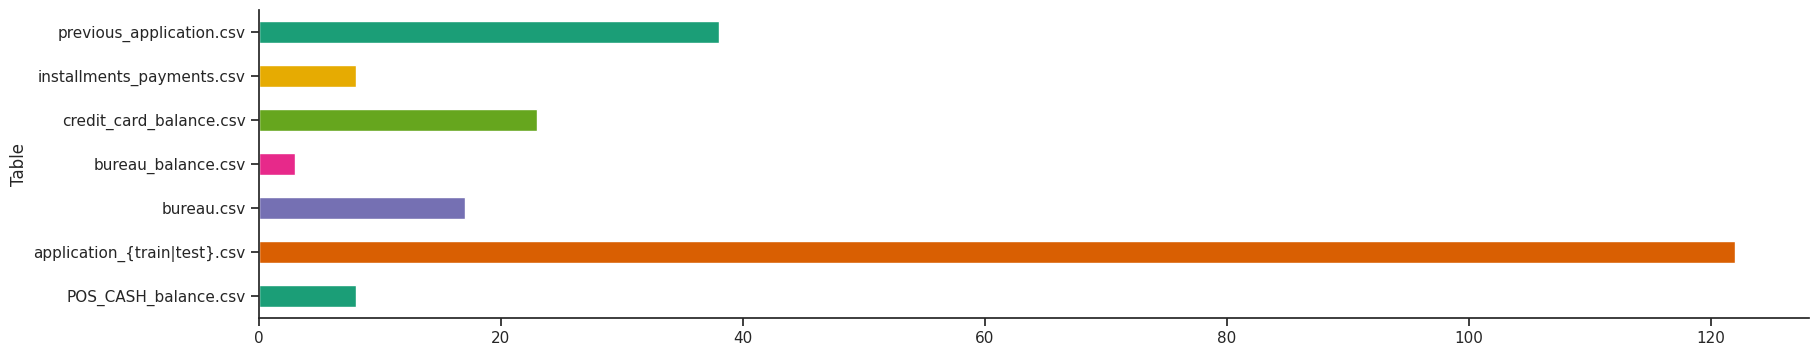

In [114]:
from matplotlib import pyplot as plt
import seaborn as sns
description_data.groupby('Table').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [115]:
# Donn√©es d'entrainement
app_train = pd.read_csv(f"{folder_path}/application_train.csv")
print('Dimensions des donn√©es d‚Äôentra√Ænement : ', app_train.shape)
app_train.head()

Dimensions des donn√©es d‚Äôentra√Ænement :  (307511, 122)


SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

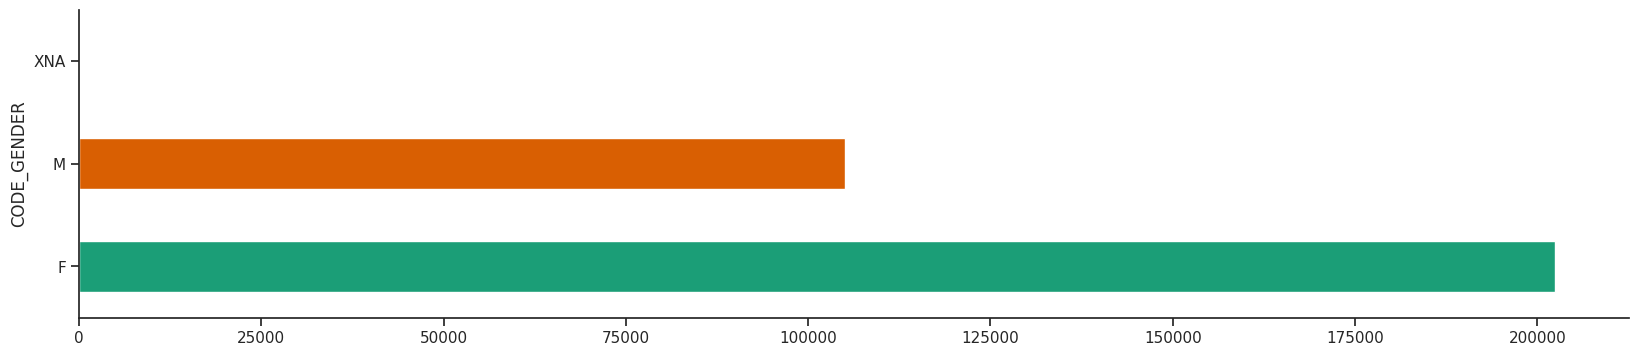

In [116]:
from matplotlib import pyplot as plt
import seaborn as sns
app_train.groupby('CODE_GENDER').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [117]:
print(app_train['FLAG_OWN_REALTY'].value_counts())


FLAG_OWN_REALTY
Y    213312
N     94199
Name: count, dtype: int64


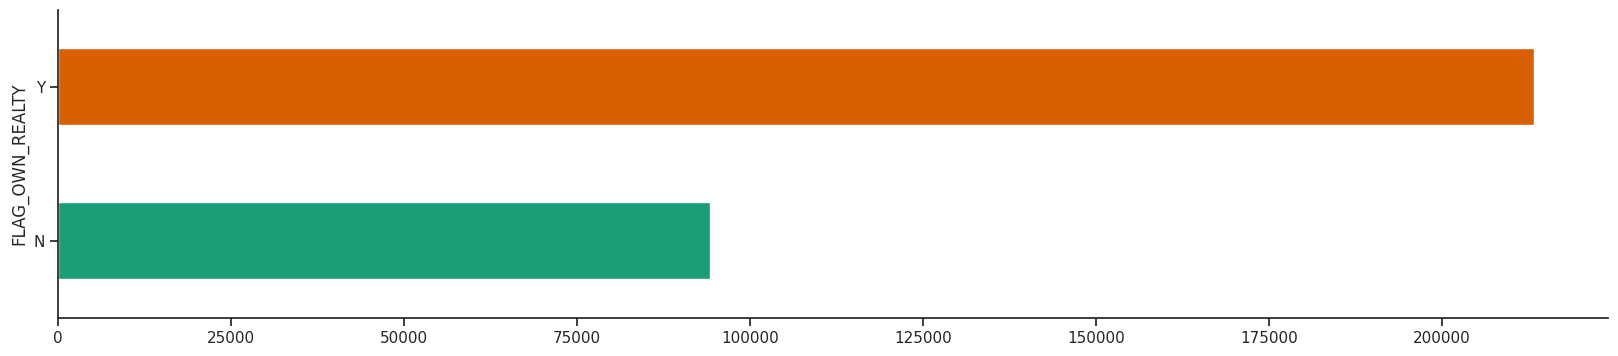

In [118]:
from matplotlib import pyplot as plt
import seaborn as sns
app_train.groupby('FLAG_OWN_REALTY').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

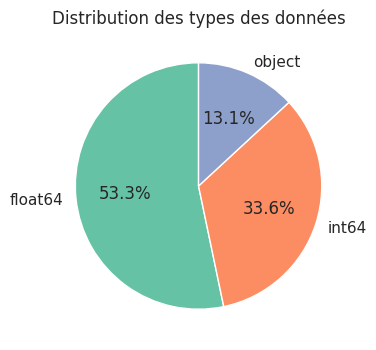

In [119]:
dtype_counts = app_train.dtypes.value_counts()

dtype_counts.plot.pie(autopct="%1.1f%%", labels=dtype_counts.index, startangle=90, colors=["#66c2a5", "#fc8d62", "#8da0cb", "#e78ac3"])
plt.title("Distribution des types des donn√©es")
plt.ylabel("")  # Remove default ylabel
plt.show()

Le total de valeurs manquante est de: 9152465, soit un pourcenatge de 24.39594190712943


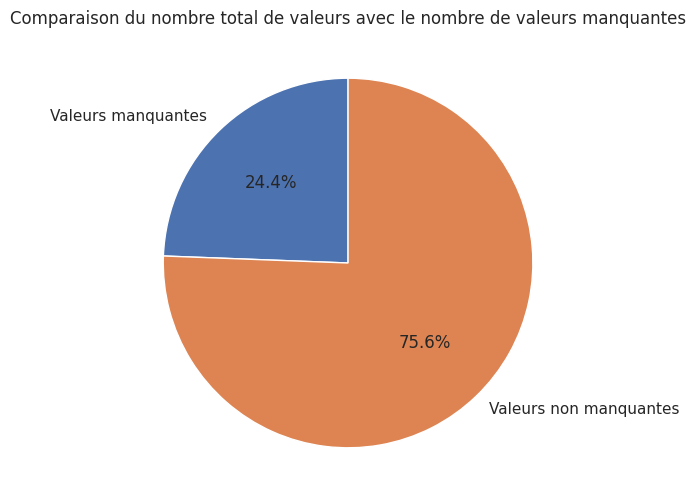

In [120]:
# Le total de valeurs manquantes
missing_values = app_train.isna().sum()

total_missing_values = missing_values.sum()
print(f"Le total de valeurs manquante est de: {total_missing_values}, soit un pourcenatge de {100*(total_missing_values / app_train.size)}" )
labels = ['Valeurs manquantes', 'Valeurs non manquantes']

values = [total_missing_values, app_train.size - total_missing_values]

plt.figure(figsize=(8, 6))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=90)

plt.title("Comparaison du nombre total de valeurs avec le nombre de valeurs manquantes")

plt.show()

Les donn√©es d‚Äôentra√Ænement contiennent 307511 observations (chacune correspondant √† un pr√™t distinct) et 122 caract√©ristiques (variables), y compris la variable TARGET (le label que nous souhaitons pr√©dire).

In [121]:
# Donn√©es de tests
app_test = pd.read_csv(f"{folder_path}application_test.csv")
print('Dimensions des donn√©es de test: ', app_test.shape)
app_test.head()

Dimensions des donn√©es de test:  (48744, 121)


SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0      100001         Cash loans           F            N               Y   
1      100005         Cash loans           M            N               Y   
2      100013         Cash loans           M            Y               Y   
3      100028         Cash loans           F            N               Y   
4      100038         Cash loans           M            Y               N   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          135000.0    568800.0      20560.5         450000.0   
1             0           99000.0    222768.0      17370.0         180000.0   
2             0          202500.0    663264.0      69777.0         630000.0   
3             2          315000.0   1575000.0      49018.5        1575000.0   
4             1          180000.0    625500.0      32067.0         625500.0   

   ... FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                0                0                0                0   
1  ...                0                0                0                0   
2  ...                0                0                0                0   
3  ...                0                0                0                0   
4  ...                0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                        0.0   
1                        0.0                        0.0   
2                        0.0                        0.0   
3                        0.0                        0.0   
4                        NaN                        NaN   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         0.0                        0.0   
4                         NaN                        NaN   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         0.0  
1                        0.0                         3.0  
2                        1.0                         4.0  
3                        0.0                         3.0  
4                        NaN                         NaN  

[5 rows x 121 columns]

## Exploration de la colonne cible

La cible est ce que nous devons pr√©dire : soit un 0 si le pr√™t a √©t√© rembours√© √† temps, soit un 1 indiquant que le client a rencontr√© des difficult√©s de paiement. Nous pouvons commencer par examiner le nombre de pr√™ts dans chaque cat√©gorie.

In [122]:
app_train['TARGET'].value_counts()

TARGET
0    282686
1     24825
Name: count, dtype: int64

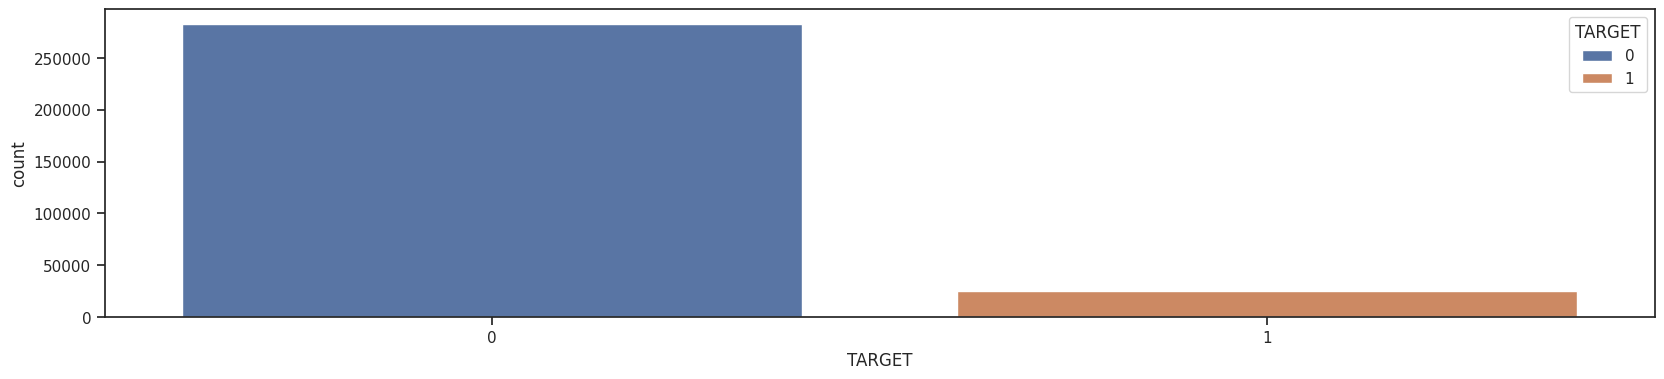

In [123]:
fig, ax = plt.subplots()
sns.countplot(data=app_train, x='TARGET', ax=ax, hue='TARGET')
xticks = ax.xaxis.get_ticks_position()
ax.xaxis.set_ticks([0, 1])
plt.show()

√Ä partir de ces informations, nous constatons qu'il s'agit d'un probl√®me de classes d√©s√©quilibr√©es. Il y a beaucoup plus de pr√™ts rembours√©s √† temps que de pr√™ts non rembours√©s. Lorsque nous utiliserons des mod√®les de machine learning plus sophistiqu√©s, nous pourrons pond√©rer les classes en fonction de leur repr√©sentation dans les donn√©es afin de tenir compte de ce d√©s√©quilibre.

## Exploration des valeurs manquantes

In [124]:
# Fonction pour calcluer le pourcentage de valeurs manquantes par colonne
def missing_values_table(df):
        mis_val = df.isnull().sum()

        mis_val_percent = 100 * df.isnull().mean()

        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)

        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})

        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)

        print ("Le dataframe contient " + str(df.shape[1]) + " colonnes.\n"
            "Il ya " + str(mis_val_table_ren_columns.shape[0]) +
              " colonnes presentant des valeurs manquantes.")

        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [125]:
# Missing values statistics
missing_values = missing_values_table(app_train)
missing_values

Le dataframe contient 122 colonnes.
Il ya 67 colonnes presentant des valeurs manquantes.


Missing Values  % of Total Values
COMMONAREA_MEDI                       214865               69.9
COMMONAREA_AVG                        214865               69.9
COMMONAREA_MODE                       214865               69.9
NONLIVINGAPARTMENTS_MEDI              213514               69.4
NONLIVINGAPARTMENTS_MODE              213514               69.4
NONLIVINGAPARTMENTS_AVG               213514               69.4
FONDKAPREMONT_MODE                    210295               68.4
LIVINGAPARTMENTS_MODE                 210199               68.4
LIVINGAPARTMENTS_MEDI                 210199               68.4
LIVINGAPARTMENTS_AVG                  210199               68.4
FLOORSMIN_MODE                        208642               67.8
FLOORSMIN_MEDI                        208642               67.8
FLOORSMIN_AVG                         208642               67.8
YEARS_BUILD_MODE                      204488               66.5
YEARS_BUILD_MEDI                      204488               66.5
YEARS_BUILD_AVG                       204488               66.5
OWN_CAR_AGE                           202929               66.0
LANDAREA_AVG                          182590               59.4
LANDAREA_MEDI                         182590               59.4
LANDAREA_MODE                         182590               59.4
BASEMENTAREA_MEDI                     179943               58.5
BASEMENTAREA_AVG                      179943               58.5
BASEMENTAREA_MODE                     179943               58.5
EXT_SOURCE_1                          173378               56.4
NONLIVINGAREA_MEDI                    169682               55.2
NONLIVINGAREA_MODE                    169682               55.2
NONLIVINGAREA_AVG                     169682               55.2
ELEVATORS_MEDI                        163891               53.3
ELEVATORS_MODE                        163891               53.3
ELEVATORS_AVG                         163891               53.3
WALLSMATERIAL_MODE                    156341               50.8
APARTMENTS_MODE                       156061               50.7
APARTMENTS_MEDI                       156061               50.7
APARTMENTS_AVG                        156061               50.7
ENTRANCES_MODE                        154828               50.3
ENTRANCES_AVG                         154828               50.3
ENTRANCES_MEDI                        154828               50.3
LIVINGAREA_MEDI                       154350               50.2
LIVINGAREA_MODE                       154350               50.2
LIVINGAREA_AVG                        154350               50.2
HOUSETYPE_MODE                        154297               50.2
FLOORSMAX_MEDI                        153020               49.8
FLOORSMAX_AVG                         153020               49.8
FLOORSMAX_MODE                        153020               49.8
YEARS_BEGINEXPLUATATION_AVG           150007               48.8
YEARS_BEGINEXPLUATATION_MEDI          150007               48.8
YEARS_BEGINEXPLUATATION_MODE          150007               48.8
TOTALAREA_MODE                        148431               48.3
EMERGENCYSTATE_MODE                   145755               47.4
OCCUPATION_TYPE                        96391               31.3
EXT_SOURCE_3                           60965               19.8
AMT_REQ_CREDIT_BUREAU_WEEK             41519               13.5
AMT_REQ_CREDIT_BUREAU_DAY              41519               13.5
AMT_REQ_CREDIT_BUREAU_MON              41519               13.5
AMT_REQ_CREDIT_BUREAU_QRT              41519               13.5
AMT_REQ_CREDIT_BUREAU_HOUR             41519               13.5
AMT_REQ_CREDIT_BUREAU_YEAR             41519               13.5
NAME_TYPE_SUITE                         1292                0.4
DEF_30_CNT_SOCIAL_CIRCLE                1021                0.3
OBS_60_CNT_SOCIAL_CIRCLE                1021                0.3
DEF_60_CNT_SOCIAL_CIRCLE                1021                0.3
OBS_30_CNT_SOCIAL_CIRCLE                1021                0.

La majorit√© des mod√®les de machine learning ne supporte pas les valeurs manquantes, ce qui rend n√©cessaire un traitement sp√©cifique des donn√©es manquantes.

Dans notre cas, nous allons supprimer toutes les variables ayant un taux d'incompl√©tude sup√©rieur √† 50 %.

Nous avons remarqu√© que ces variables correspondent toutes √† des caract√©ristiques li√©es √† l'habitation du client.

Pour le reste des vaeurs nous les traiterons plus tard

In [126]:
cols_to_drop = [col for col in app_train.columns
                if (100 * app_train[col].isnull().mean()) >= 50]
app_train  = app_train.drop(columns=cols_to_drop)

In [127]:
missing_values_table(app_train)

Le dataframe contient 81 colonnes.
Il ya 26 colonnes presentant des valeurs manquantes.


Missing Values  % of Total Values
FLOORSMAX_AVG                         153020               49.8
FLOORSMAX_MODE                        153020               49.8
FLOORSMAX_MEDI                        153020               49.8
YEARS_BEGINEXPLUATATION_AVG           150007               48.8
YEARS_BEGINEXPLUATATION_MODE          150007               48.8
YEARS_BEGINEXPLUATATION_MEDI          150007               48.8
TOTALAREA_MODE                        148431               48.3
EMERGENCYSTATE_MODE                   145755               47.4
OCCUPATION_TYPE                        96391               31.3
EXT_SOURCE_3                           60965               19.8
AMT_REQ_CREDIT_BUREAU_HOUR             41519               13.5
AMT_REQ_CREDIT_BUREAU_QRT              41519               13.5
AMT_REQ_CREDIT_BUREAU_MON              41519               13.5
AMT_REQ_CREDIT_BUREAU_WEEK             41519               13.5
AMT_REQ_CREDIT_BUREAU_DAY              41519               13.5
AMT_REQ_CREDIT_BUREAU_YEAR             41519               13.5
NAME_TYPE_SUITE                         1292                0.4
DEF_30_CNT_SOCIAL_CIRCLE                1021                0.3
OBS_60_CNT_SOCIAL_CIRCLE                1021                0.3
DEF_60_CNT_SOCIAL_CIRCLE                1021                0.3
OBS_30_CNT_SOCIAL_CIRCLE                1021                0.3
EXT_SOURCE_2                             660                0.2
AMT_GOODS_PRICE                          278                0.1
AMT_ANNUITY                               12                0.0
CNT_FAM_MEMBERS                            2                0.0
DAYS_LAST_PHONE_CHANGE                     1                0.0

Le total de valeurs manquante est de: 1616066, soit un pourcenatge de 6.48803850879007


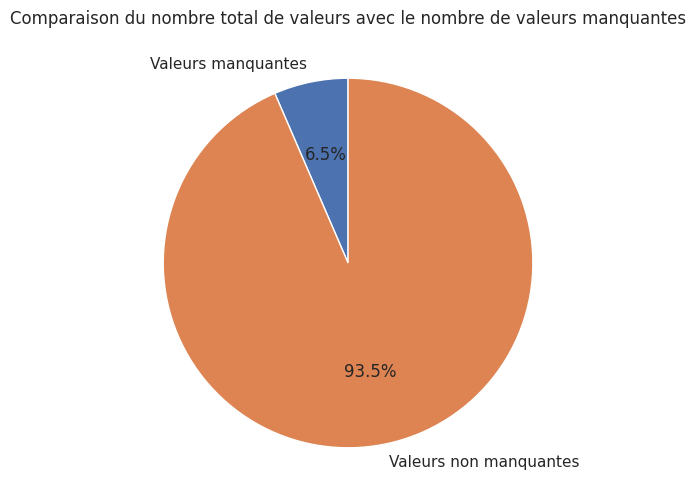

In [128]:
# Le total de valeurs manquantes
missing_values = app_train.isna().sum()

total_missing_values = missing_values.sum()
print(f"Le total de valeurs manquante est de: {total_missing_values}, soit un pourcenatge de {100*(total_missing_values / app_train.size)}" )
labels = ['Valeurs manquantes', 'Valeurs non manquantes']

values = [total_missing_values, app_train.size - total_missing_values]

plt.figure(figsize=(8, 6))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=90)

plt.title("Comparaison du nombre total de valeurs avec le nombre de valeurs manquantes")

plt.show()

In [129]:
# Aligner les deux datasets
train_labels = app_train['TARGET']

app_train, app_test = app_train.align(app_test, join = 'inner', axis = 1)
app_train['TARGET'] = train_labels

## Exploration des Anomalies (outliers)

Un probl√®me auquel nous devons toujours pr√™ter attention lors de l'analyse exploratoire des donn√©es (EDA) est la pr√©sence d'anomalies dans les donn√©es. Celles-ci peuvent √™tre dues √† des erreurs de saisie, √† des d√©fauts dans les √©quipements de mesure, ou elles peuvent repr√©senter des valeurs valides mais extr√™mes. Une fa√ßon de soutenir l'identification des anomalies de mani√®re quantitative est d'examiner les statistiques d'une colonne en utilisant la m√©thode describe.

In [130]:
# Description de l'ensemble des variables quantitatives
app_train.describe()

SK_ID_CURR   CNT_CHILDREN  AMT_INCOME_TOTAL    AMT_CREDIT  \
count  307511.000000  307511.000000      3.075110e+05  3.075110e+05   
mean   278180.518577       0.417052      1.687979e+05  5.990260e+05   
std    102790.175348       0.722121      2.371231e+05  4.024908e+05   
min    100002.000000       0.000000      2.565000e+04  4.500000e+04   
25%    189145.500000       0.000000      1.125000e+05  2.700000e+05   
50%    278202.000000       0.000000      1.471500e+05  5.135310e+05   
75%    367142.500000       1.000000      2.025000e+05  8.086500e+05   
max    456255.000000      19.000000      1.170000e+08  4.050000e+06   

         AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  \
count  307499.000000     3.072330e+05               307511.000000   
mean    27108.573909     5.383962e+05                    0.020868   
std     14493.737315     3.694465e+05                    0.013831   
min      1615.500000     4.050000e+04                    0.000290   
25%     16524.000000     2.385000e+05                    0.010006   
50%     24903.000000     4.500000e+05                    0.018850   
75%     34596.000000     6.795000e+05                    0.028663   
max    258025.500000     4.050000e+06                    0.072508   

          DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  ...  FLAG_DOCUMENT_19  \
count  307511.000000  307511.000000      307511.000000  ...     307511.000000   
mean   -16036.995067   63815.045904       -4986.120328  ...          0.000595   
std      4363.988632  141275.766519        3522.886321  ...          0.024387   
min    -25229.000000  -17912.000000      -24672.000000  ...          0.000000   
25%    -19682.000000   -2760.000000       -7479.500000  ...          0.000000   
50%    -15750.000000   -1213.000000       -4504.000000  ...          0.000000   
75%    -12413.000000    -289.000000       -2010.000000  ...          0.000000   
max     -7489.000000  365243.000000           0.000000  ...          1.000000   

       FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  AMT_REQ_CREDIT_BUREAU_HOUR  \
count     307511.000000     307511.000000               265992.000000   
mean           0.000507          0.000335                    0.006402   
std            0.022518          0.018299                    0.083849   
min            0.000000          0.000000                    0.000000   
25%            0.000000          0.000000                    0.000000   
50%            0.000000          0.000000                    0.000000   
75%            0.000000          0.000000                    0.000000   
max            1.000000          1.000000                    4.000000   

       AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  \
count              265992.000000               265992.000000   
mean                    0.007000                    0.034362   
std                     0.110757                    0.204685   
min                     0.000000                    0.000000   
25%                     0.000000                    0.000000   
50%                     0.000000                    0.000000   
75%                     0.000000                    0.000000   
max                     9.000000                    8.000000   

       AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  \
count              265992.000000              265992.000000   
mean                    0.267395                   0.265474   
std                     0.916002                   0.794056   
min                     0.000000                   0.000000   
25%                     0.000000                   0.000000   
50%                     0.000000                   0.000000   
75%                     0.000000                   0.000000   
max                    27.000000                 261.000000   

       AMT_REQ_CREDIT_BUREAU_YEAR         TARGET  
count               265992.000000  307511.000000  
mean                     1.899974       0.080729  
std                      1.869295       0.272419  
min        

#### `DAYS_BIRTH`

Les nombres dans la colonne `DAYS_BIRTH` sont n√©gatifs parce qu'ils sont enregistr√©s par rapport √† la demande de pr√™t actuelle. Pour voir ces statistiques en ann√©es, nous pouvons multiplier par -1 et diviser par le nombre de jours dans une ann√©e.

In [131]:
(app_train['DAYS_BIRTH'] / -365).describe()

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64

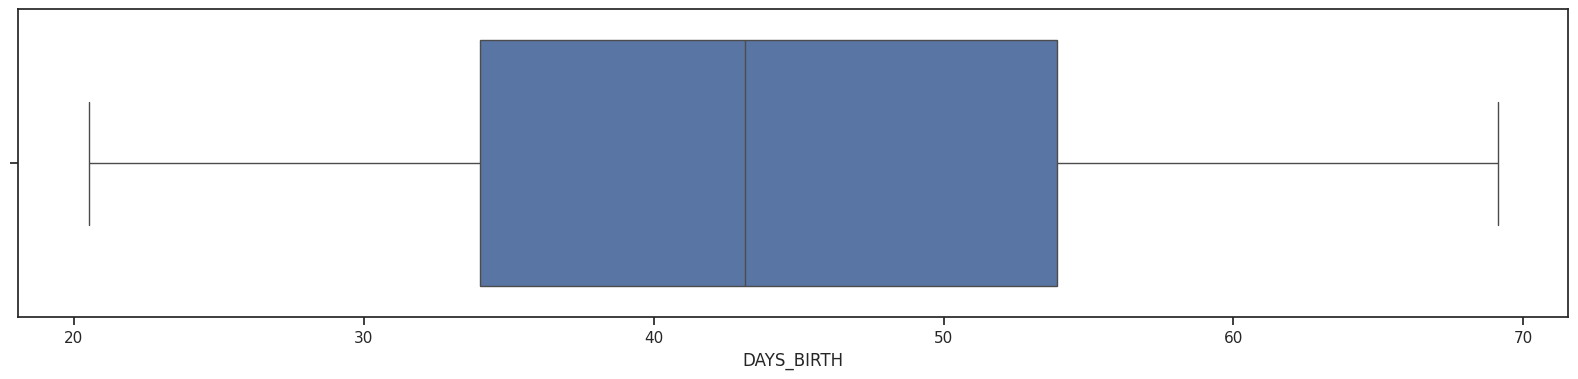

In [132]:
sns.boxplot(x=(app_train['DAYS_BIRTH'] / -365))
plt.show()

Ces statistiques semblent raisonables. Il n'y a pas d'outliers pour l'√¢ge.

#### `DAYS_EMPLOYED`
La variabe `DAYS_EMPLOYED` represente le nombre de jour avant la demande pendant lequel la personne a commenc√© son emploi actuel. Elle est exprim√©e en valeur negative.

Pour v√©rifier les anomalies dans la variable, nous allons proc√©der de la m√™me mani√®re que pour DAYS_BIRTH.

In [133]:
app_train['DAYS_EMPLOYED'].describe()

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

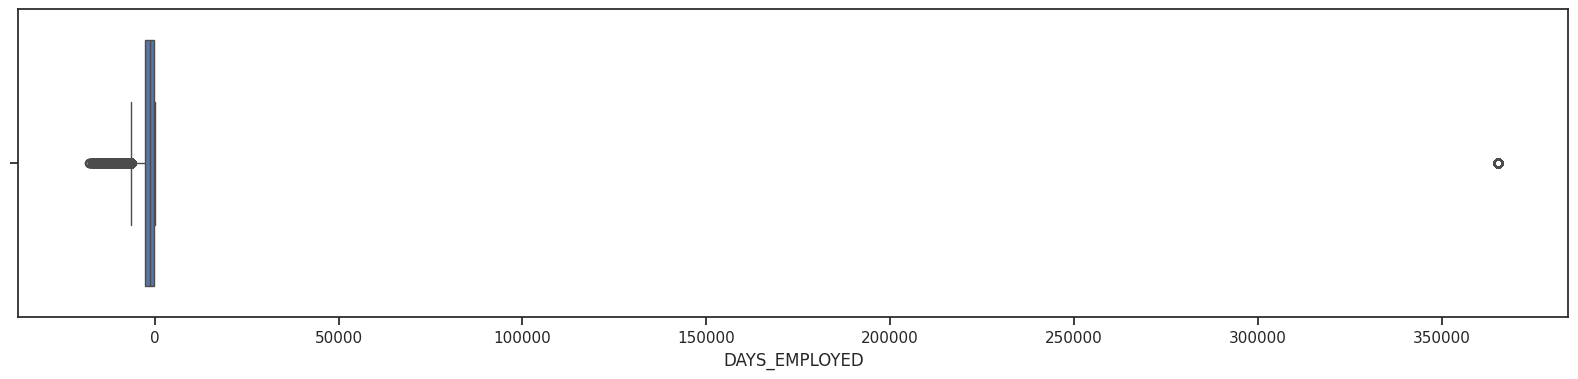

In [134]:
sns.boxplot(x=(app_train['DAYS_EMPLOYED']))
plt.show()

La description statistique de la variable montre une valeur maximale positive qui pourrait correspondre √† 1000 ann√©es de travail, ce qui est impossible.

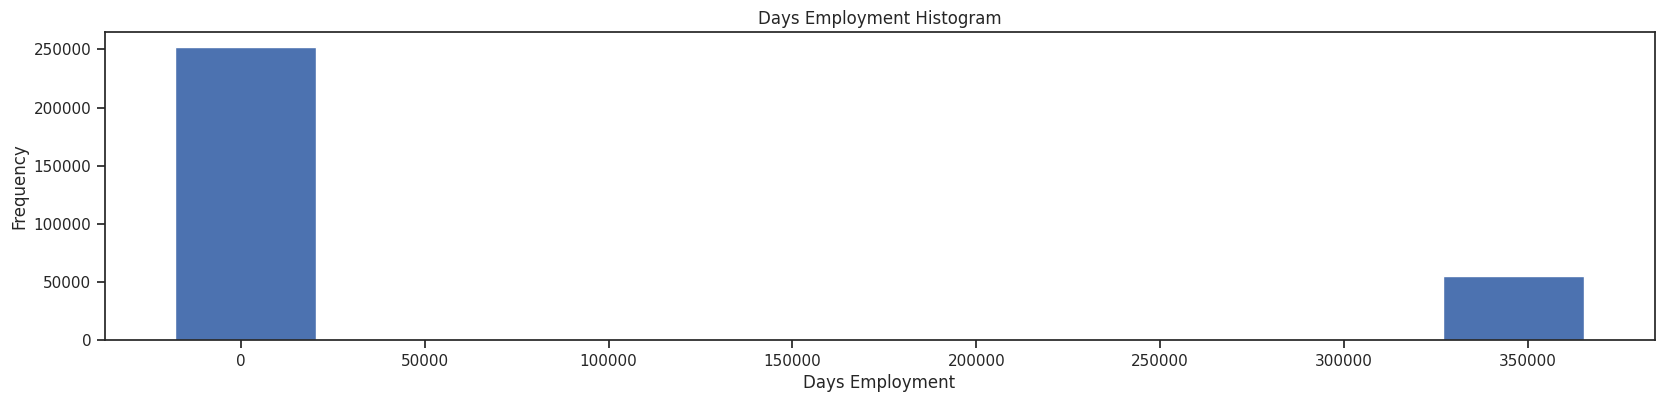

In [135]:
app_train['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment');

Par simple curiosit√©, examinons les clients anormaux et voyons s'ils ont des taux de d√©faut plus √©lev√©s ou plus bas que les autres clients.

In [136]:
anom = app_train[app_train['DAYS_EMPLOYED'] == 365243]
non_anom = app_train[app_train['DAYS_EMPLOYED'] != 365243]
print('Les clients normaux ont un taux de d√©faut de %0.2f%%  sur les pr√™ts' % (100 * non_anom['TARGET'].mean()))
print('Les clients anormaux ont un taux de d√©faut de %0.2f%% sur les pr√™ts' % (100 * anom['TARGET'].mean()))
print('Il y a %d jours d\'emploi anormaux.' % len(anom))

Les clients normaux ont un taux de d√©faut de 8.66%  sur les pr√™ts
Les clients anormaux ont un taux de d√©faut de 5.40% sur les pr√™ts
Il y a 55374 jours d'emploi anormaux.


Il s'av√®re que les anomalies ont un taux de d√©faut plus faible.

Le traitement des anomalies d√©pend de la situation exacte, sans r√®gles strictes. L'une des approches les plus s√ªres consiste simplement √† d√©finir les anomalies comme des valeurs manquantes, puis √† les remplir (par imputation) avant d'appliquer les mod√®les de machine learning. Dans ce cas, comme toutes les anomalies ont exactement la m√™me valeur, nous voulons les remplir avec la m√™me valeur, au cas o√π tous ces pr√™ts partageraient quelque chose en commun. Les valeurs anormales semblent avoir une certaine importance, nous voulons donc informer le mod√®le de machine learning si nous avons effectivement rempli ces valeurs. Comme solution, nous allons remplir les valeurs anormales avec une valeur `np.nan` (pas un nombre), puis cr√©er une nouvelle colonne bool√©enne indiquant si la valeur √©tait anormale ou non.

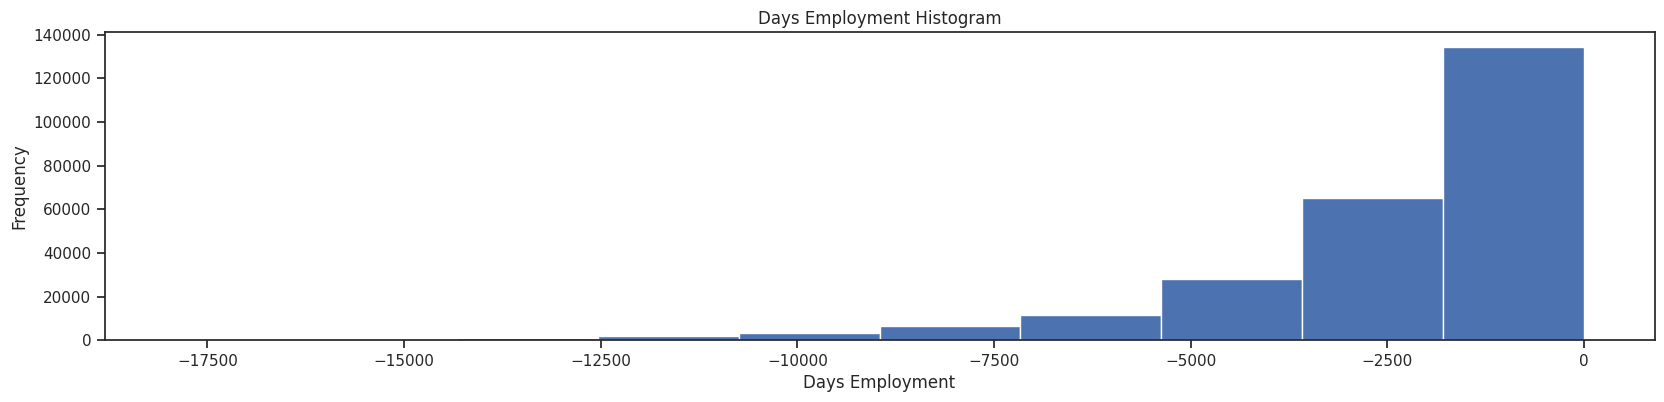

In [137]:
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243

app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

app_train['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment');

In [138]:
app_test['DAYS_EMPLOYED_ANOM'] = app_test["DAYS_EMPLOYED"] == 365243
app_test["DAYS_EMPLOYED"].replace({365243: np.nan}, inplace = True)

print('Il y a %d anomalies dans les donn√©es de test sur %d entr√©es' % (app_test["DAYS_EMPLOYED_ANOM"].sum(), len(app_test)))

Il y a 9274 anomalies dans les donn√©es de test sur 48744 entr√©es


## Analyse univari√©e

### variables cat√©gorielles

Dans cette partie nous allons analyser les vraiables categorielles.

In [139]:
def bar_plot(df, col, title, orient="v"):
    """
    Cr√©e un diagramme √† barres pour une colonne sp√©cifique d'un DataFrame.

    Param√®tres :
    ------------
    df : pandas.DataFrame
        Le DataFrame contenant les donn√©es √† visualiser.
    col : str
        Le nom de la colonne du DataFrame √† repr√©senter sous forme de diagramme √† barres.
    title : str
        Le titre du graphique.
    orient: str, default='v'
        L'orientation de la diagramme.

    Retourne :
    ----------
    None
        La fonction affiche le graphique mais ne retourne aucune valeur.
    """
    fig, ax = plt.subplots()

    params = {
        'x': col if orient=="v" else None,
        'y': col if orient=="h" else None,
    }
    sns.countplot(
        data=df,
        y=col if orient=="h" else None,
        x=col if orient=="v" else None,
        hue=col,
        ax=ax
    )

    total = len(df)
    for patch in ax.patches:
        count = patch.get_width() if orient=='h' else patch.get_height()
        percentage = f"{(count / total) * 100:.2f}%"

        if(orient=='v'):
            ax.text(
                patch.get_x() + patch.get_width() / 2,
                count + 0.2,
                f"{count}({percentage})",
                ha='center',
                color='darkblue',
                fontweight='bold',
            )
        else:
            ax.text(
                count / 2,
                patch.get_y() + patch.get_height() / 2,
                f"{count}({percentage})",
                va='center',
                color='darkblue',
                fontweight='bold',
                #bbox=dict(facecolor='lightyellow', alpha=0.5)
            )

    plt.title(title, loc="center", fontsize=18, fontstyle='italic')
    plt.show()

In [140]:
app_train.describe(include='O').T

count unique                            top  \
NAME_CONTRACT_TYPE          307511      2                     Cash loans   
CODE_GENDER                 307511      3                              F   
FLAG_OWN_CAR                307511      2                              N   
FLAG_OWN_REALTY             307511      2                              Y   
NAME_TYPE_SUITE             306219      7                  Unaccompanied   
NAME_INCOME_TYPE            307511      8                        Working   
NAME_EDUCATION_TYPE         307511      5  Secondary / secondary special   
NAME_FAMILY_STATUS          307511      6                        Married   
NAME_HOUSING_TYPE           307511      6              House / apartment   
OCCUPATION_TYPE             211120     18                       Laborers   
WEEKDAY_APPR_PROCESS_START  307511      7                        TUESDAY   
ORGANIZATION_TYPE           307511     58         Business Entity Type 3   
EMERGENCYSTATE_MODE         161756      2                             No   

                              freq  
NAME_CONTRACT_TYPE          278232  
CODE_GENDER                 202448  
FLAG_OWN_CAR                202924  
FLAG_OWN_REALTY             213312  
NAME_TYPE_SUITE             248526  
NAME_INCOME_TYPE            158774  
NAME_EDUCATION_TYPE         218391  
NAME_FAMILY_STATUS          196432  
NAME_HOUSING_TYPE           272868  
OCCUPATION_TYPE              55186  
WEEKDAY_APPR_PROCESS_START   53901  
ORGANIZATION_TYPE            67992  
EMERGENCYSTATE_MODE         159428

#### *CODE_GENDER*

In [141]:
app_train.CODE_GENDER.value_counts()

CODE_GENDER
F      202448
M      105059
XNA         4
Name: count, dtype: int64

Nous avons ici observations dont le genre est `XNA`, pour ces observations nous allons remplacer les valeurs par la modalit√© la plus fr√©quente (F)

In [142]:
app_train.CODE_GENDER.where(app_train['CODE_GENDER'] != 'XNA', 'F', inplace=True)

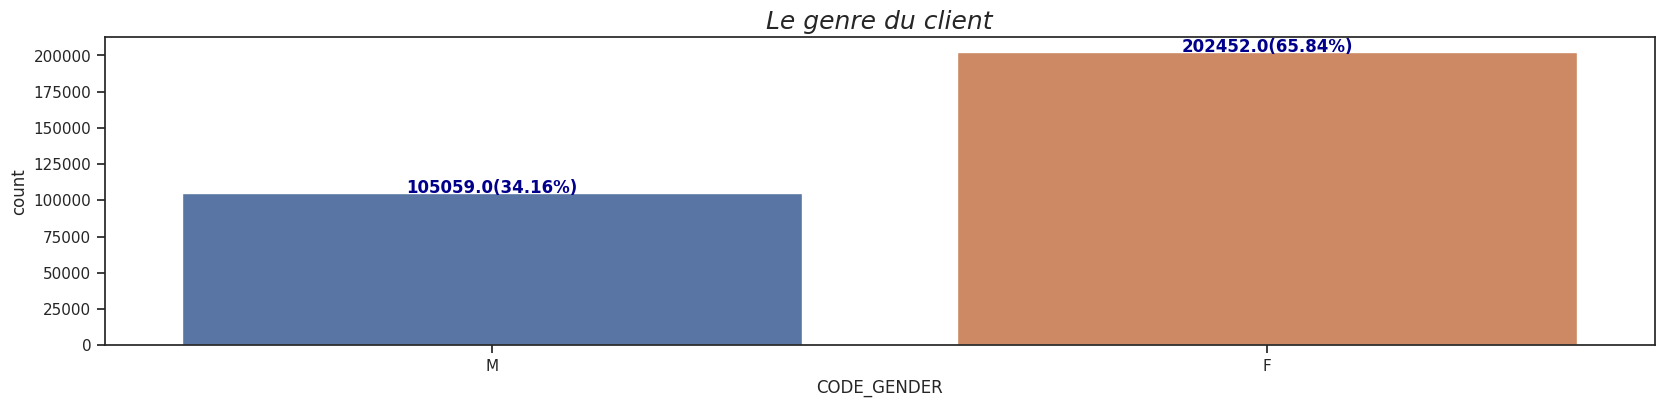

In [143]:
bar_plot(app_train, 'CODE_GENDER', title='Le genre du client')

#### *NAME_TYPE_SUITE*

In [144]:
app_train.NAME_TYPE_SUITE.value_counts()

NAME_TYPE_SUITE
Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: count, dtype: int64

Nous allons reduire les modalit√©s en seulement deux cat√©gories: **accompanied** et **unaccompanied**

In [145]:
map_type_suite = {
    'Unaccompanied': 'Unaccompanied',
    'Family': 'Accompanied',
    'Spouse, partner': 'Accompanied',
    'Children': 'Accompanied',
    'Other_B': 'Accompanied',
    'Other_A':'Accompanied',
    'Group of people': 'Accompanied'
}
app_train.NAME_TYPE_SUITE = app_train.NAME_TYPE_SUITE.map(map_type_suite)
# Appliquer ce changement au dataset test
app_test.NAME_TYPE_SUITE = app_test.NAME_TYPE_SUITE.map(map_type_suite)

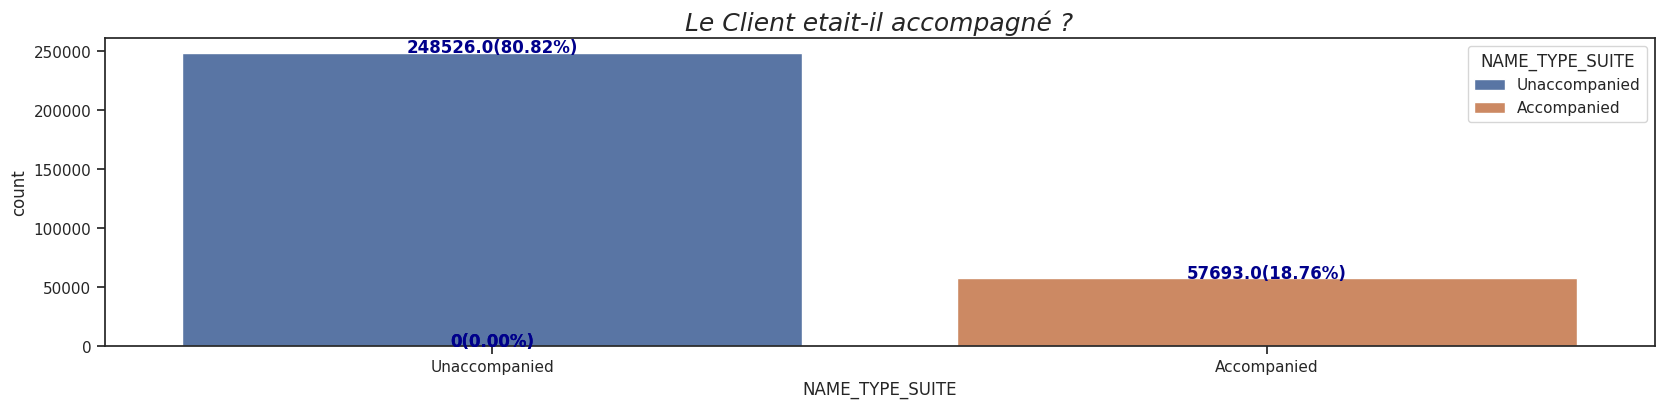

In [146]:
bar_plot(app_train, 'NAME_TYPE_SUITE', title='Le Client etait-il accompagn√© ?')

### variables quantitatives


In [147]:
app_train.describe().T

count           mean            std  \
SK_ID_CURR                    307511.0  278180.518577  102790.175348   
CNT_CHILDREN                  307511.0       0.417052       0.722121   
AMT_INCOME_TOTAL              307511.0  168797.919297  237123.146279   
AMT_CREDIT                    307511.0  599025.999706  402490.776996   
AMT_ANNUITY                   307499.0   27108.573909   14493.737315   
AMT_GOODS_PRICE               307233.0  538396.207429  369446.460540   
REGION_POPULATION_RELATIVE    307511.0       0.020868       0.013831   
DAYS_BIRTH                    307511.0  -16036.995067    4363.988632   
DAYS_EMPLOYED                 252137.0   -2384.169325    2338.360162   
DAYS_REGISTRATION             307511.0   -4986.120328    3522.886321   
DAYS_ID_PUBLISH               307511.0   -2994.202373    1509.450419   
FLAG_MOBIL                    307511.0       0.999997       0.001803   
FLAG_EMP_PHONE                307511.0       0.819889       0.384280   
FLAG_WORK_PHONE               307511.0       0.199368       0.399526   
FLAG_CONT_MOBILE              307511.0       0.998133       0.043164   
FLAG_PHONE                    307511.0       0.281066       0.449521   
FLAG_EMAIL                    307511.0       0.056720       0.231307   
CNT_FAM_MEMBERS               307509.0       2.152665       0.910682   
REGION_RATING_CLIENT          307511.0       2.052463       0.509034   
REGION_RATING_CLIENT_W_CITY   307511.0       2.031521       0.502737   
HOUR_APPR_PROCESS_START       307511.0      12.063419       3.265832   
REG_REGION_NOT_LIVE_REGION    307511.0       0.015144       0.122126   
REG_REGION_NOT_WORK_REGION    307511.0       0.050769       0.219526   
LIVE_REGION_NOT_WORK_REGION   307511.0       0.040659       0.197499   
REG_CITY_NOT_LIVE_CITY        307511.0       0.078173       0.268444   
REG_CITY_NOT_WORK_CITY        307511.0       0.230454       0.421124   
LIVE_CITY_NOT_WORK_CITY       307511.0       0.179555       0.383817   
EXT_SOURCE_2                  306851.0       0.514393       0.191060   
EXT_SOURCE_3                  246546.0       0.510853       0.194844   
YEARS_BEGINEXPLUATATION_AVG   157504.0       0.977735       0.059223   
FLOORSMAX_AVG                 154491.0       0.226282       0.144641   
YEARS_BEGINEXPLUATATION_MODE  157504.0       0.977065       0.064575   
FLOORSMAX_MODE                154491.0       0.222315       0.143709   
YEARS_BEGINEXPLUATATION_MEDI  157504.0       0.977752       0.059897   
FLOORSMAX_MEDI                154491.0       0.225897       0.145067   
TOTALAREA_MODE                159080.0       0.102547       0.107462   
OBS_30_CNT_SOCIAL_CIRCLE      306490.0       1.422245       2.400989   
DEF_30_CNT_SOCIAL_CIRCLE      306490.0       0.143421       0.446698   
OBS_60_CNT_SOCIAL_CIRCLE      306490.0       1.405292       2.379803   
DEF_60_CNT_SOCIAL_CIRCLE      306490.0       0.100049       0.362291   
DAYS_LAST_PHONE_CHANGE        307510.0    -962.858788     826.808487   
FLAG_DOCUMENT_2               307511.0       0.000042       0.006502   
FLAG_DOCUMENT_3               307511.0       0.710023       0.453752   
FLAG_DOCUMENT_4               307511.0       0.000081       0.009016   
FLAG_DOCUMENT_5               307511.0       0.015115       0.122010   
FLAG_DOCUMENT_6               307511.0       0.088055       0.283376   
FLAG_DOCUMENT_7               307511.0       0.000192       0.013850   
FLAG_DOCUMENT_8               307511.0       0.081376       0.273412   
FLAG_DOCUMENT_9               307511.0       0.003896       0.062295   
FLAG_DOCUMENT_10              307511.0       0.000023       0.004771   
FLAG_DOCUMENT_11              307511.0       0.003912       0.062424   
FLAG_DOCUMENT_12              307511.0       0.000007       0.002550   
FLAG_DOCUMENT_13              307511.0       0.003525       0.059268   
FLAG_DOCUMENT_14              307511.0       0.002936       0.054110   
FLAG_DOCUMENT_15              307511.0       0.001210       0.034760   
F

In [148]:
def multiple_plots(df, col, title):
    """
    Cette fonction affiche trois graphiques pour chaque colonne donn√©es du dataset df

     Param√®tres :
    ------------
    df : pandas.DataFrame
        Le DataFrame contenant les donn√©es √† visualiser.
    col : str
        Le nom de la colonne du DataFrame √† repr√©senter sous forme de diagramme √† barres.
    title : str
        Le titre du graphique.

    Retourne :
    ----------
    None
        La fonction affiche les graphique mais ne retourne aucune valeur.

    """

    sns.set(style="ticks", rc = {'figure.figsize':(20, 4)})

    # histogram
    plt.subplot(1, 3, 1)
    sns.histplot(df[col], bins=30, kde=True, line_kws={"color": "red"})
    plt.title('Histogram')

    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[col], dist="norm", plot=plt)
    plt.ylabel('Variable quantiles')

    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[col])
    plt.title('Boxplot')

    plt.suptitle(f"{title}",
                 y=1.05, fontsize=20, fontstyle='italic')

    plt.show()

#### *CNT_CHILDREN*

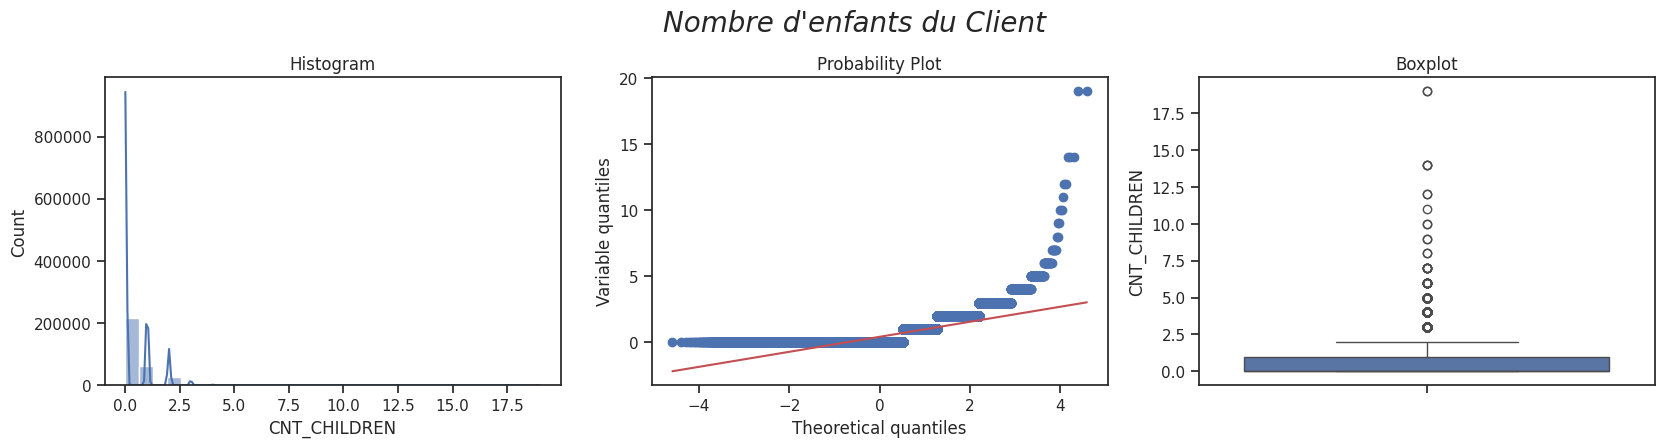

In [149]:
multiple_plots(app_train, 'CNT_CHILDREN', "Nombre d'enfants du Client")

La boite √† moustache nous montre qu'il ya des valeurs projet√©e en dehors de la boite, naturellement on pourrait croire √† une valeur abberante sauf dans ce contexte, on les gerera autrement.

Nous allons la proportion de ces valeurs par rapport aux valeurs qui semblent plus raisonables ensuite nous transformerons la variable en variable qualitative regroupant les donn√©es en 3 modalit√©: `sans_enfant`, `un_enfant` et `deux_enfants_ou_plus`.

L'avantage avec cette approche est que nous reduisons l'effet des valeurs extr√™mes qui peuvent biaiser les r√©sultats d‚Äôune analyse ou la performance d‚Äôun mod√®le.

In [150]:
childreen_0 = app_train[app_train.CNT_CHILDREN == 0]
childreen_1 = app_train[app_train.CNT_CHILDREN == 1]
childreen_2_plus = app_train[app_train.CNT_CHILDREN >= 2]

values = [childreen_0.shape[0], childreen_1.shape[0], childreen_2_plus.shape[0]]

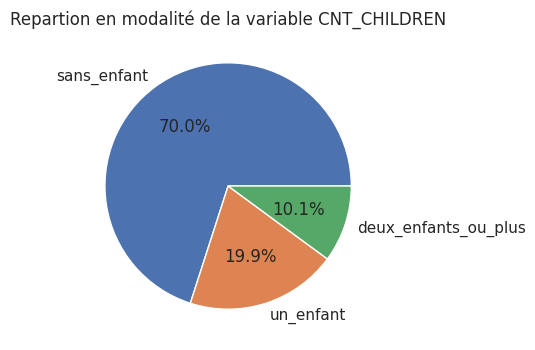

In [151]:
plt.pie(x=values, labels=['sans_enfant', 'un_enfant', 'deux_enfants_ou_plus'], autopct='%1.1f%%')
plt.title("Repartion en modalit√© de la variable CNT_CHILDREN")
plt.show()

In [152]:
# Transformation de la variable num√©rique 'CNT_CHILDREN' en variable qualitative de l'ensemble de train

app_train['nbr_enfants'] = app_train['CNT_CHILDREN']

app_train['nbr_enfants'] = np.where(app_train['CNT_CHILDREN'] == 0, 'sans_enfant', app_train['nbr_enfants'])

app_train['nbr_enfants'] = np.where(app_train['CNT_CHILDREN'] == 1, 'un_enfant', app_train['nbr_enfants'])

app_train['nbr_enfants'] = np.where(app_train['CNT_CHILDREN'] >= 2, 'deux_enfants_et_plus', app_train['nbr_enfants'])

# Transformation de la variable num√©rique 'CNT_CHILDREN' en variable qualitative de l'ensemble de test

app_test['nbr_enfants'] = app_test['CNT_CHILDREN']

app_test['nbr_enfants'] = np.where(app_test['CNT_CHILDREN'] == 0, 'sans_enfant', app_test['nbr_enfants'])

app_test['nbr_enfants'] = np.where(app_test['CNT_CHILDREN'] == 1, 'un_enfant', app_test['nbr_enfants'])

app_test['nbr_enfants'] = np.where(app_test['CNT_CHILDREN'] >= 2, 'deux_enfants_et_plus', app_test['nbr_enfants'])

# Suppression de la colonne CNT_CHILDREN
app_train.drop(labels='CNT_CHILDREN', axis=1, inplace=True)
app_test.drop(labels='CNT_CHILDREN', axis=1, inplace=True)

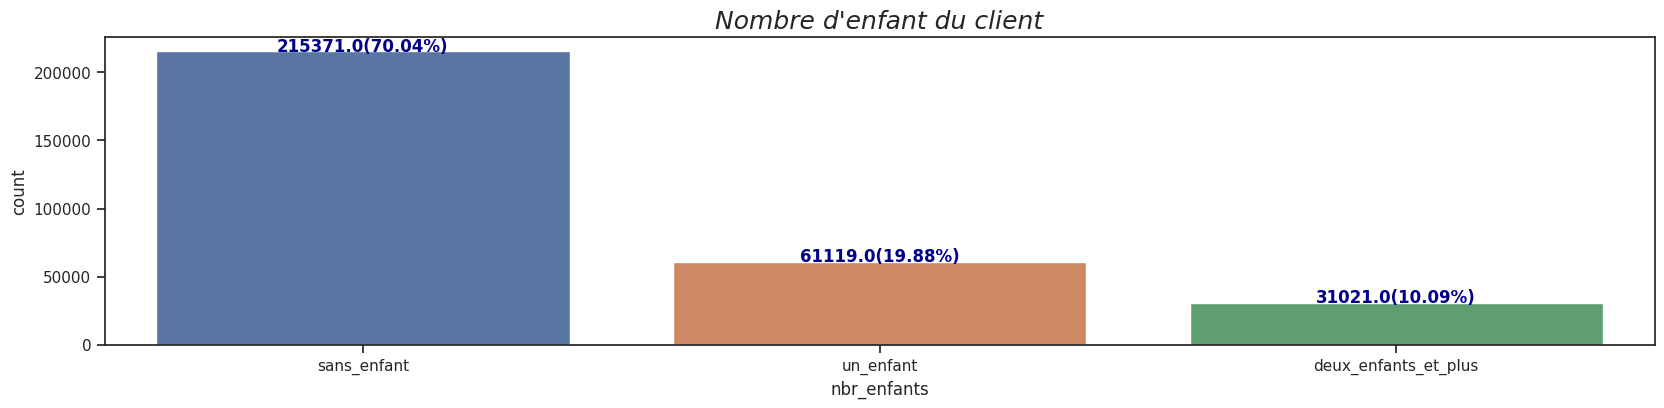

In [153]:
bar_plot(app_train, 'nbr_enfants', "Nombre d'enfant du client")

#### *AMT_INCOME_TOTAL*, *AMT_CREDIT*, *AMT_ANNUITY*, *AMT_GOODS_PRICE*, *EXT_SOURCE_2*

In [154]:
cols = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'EXT_SOURCE_2','EXT_SOURCE_3']

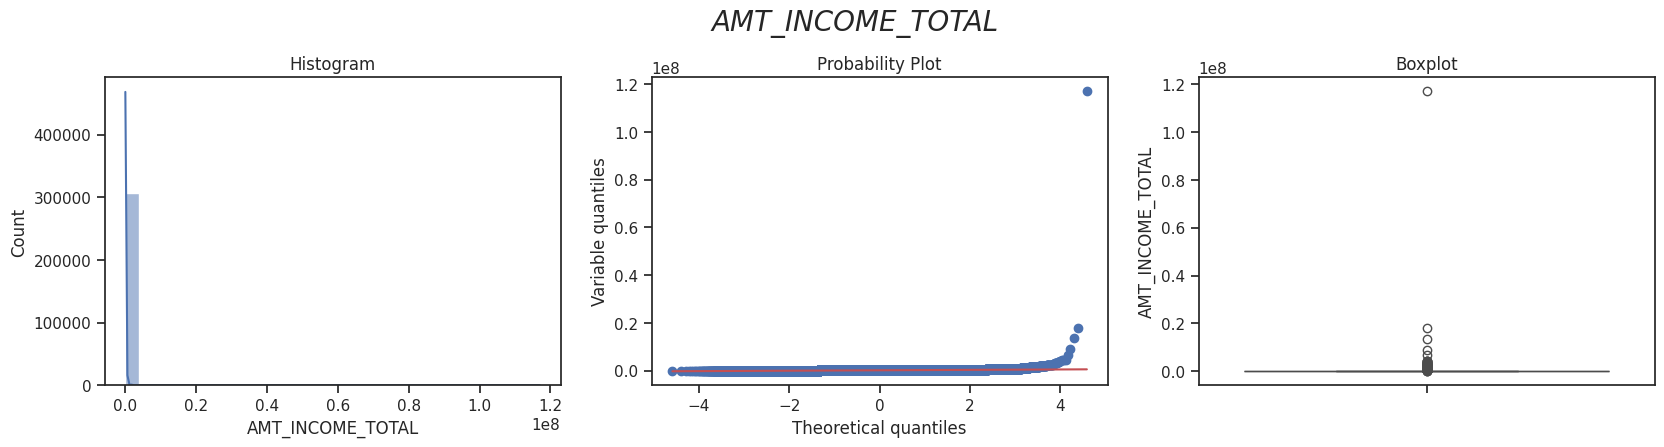

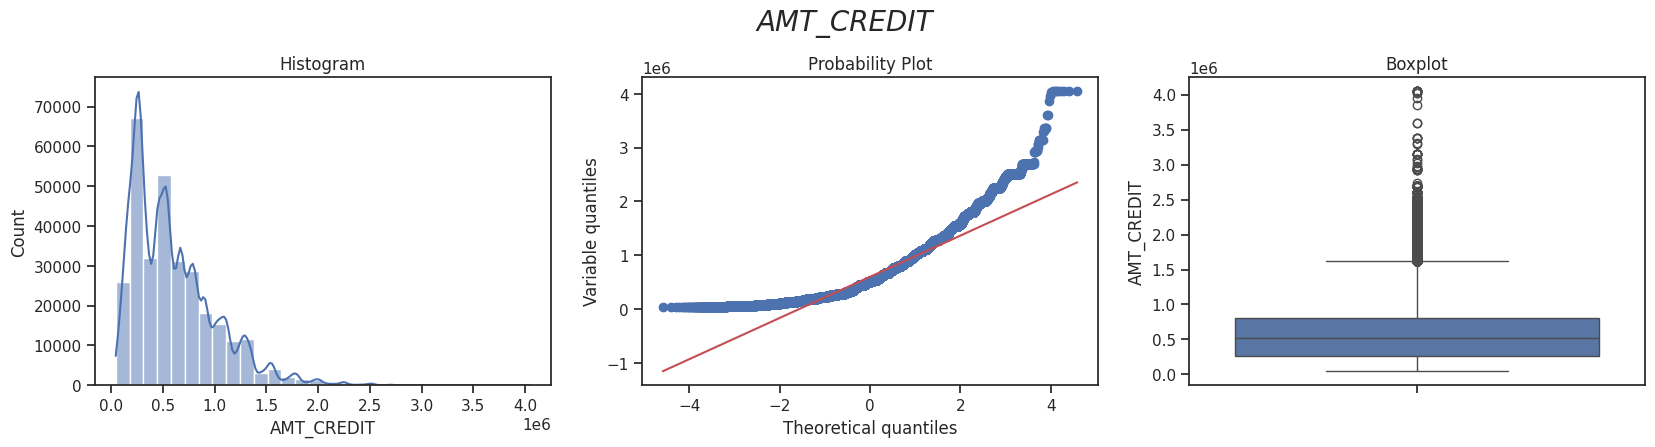

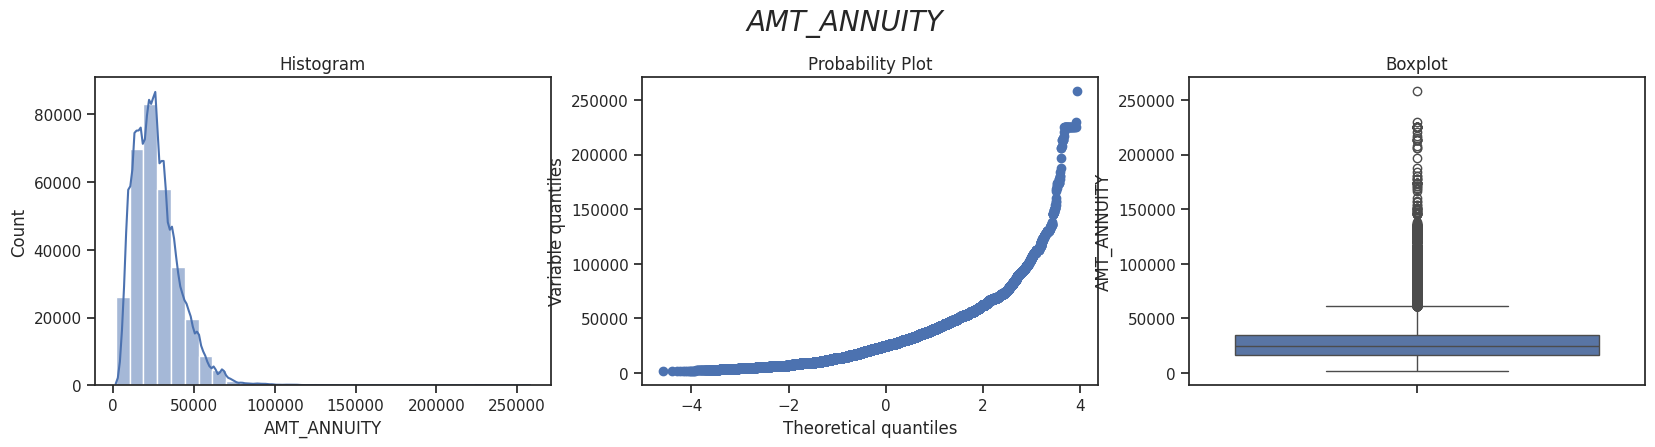

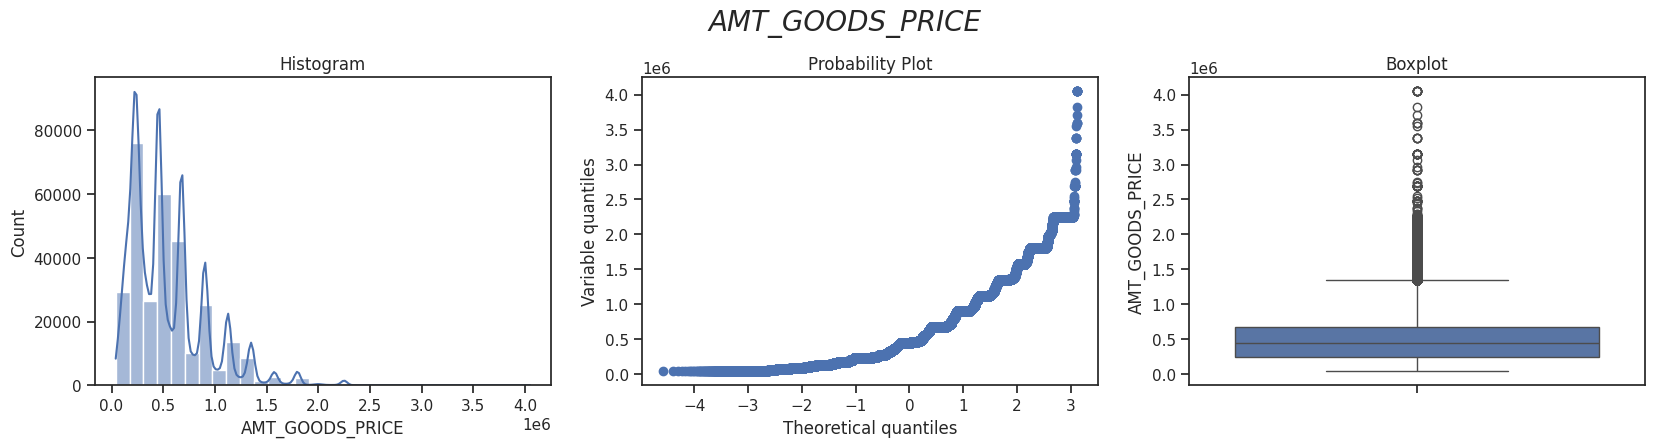

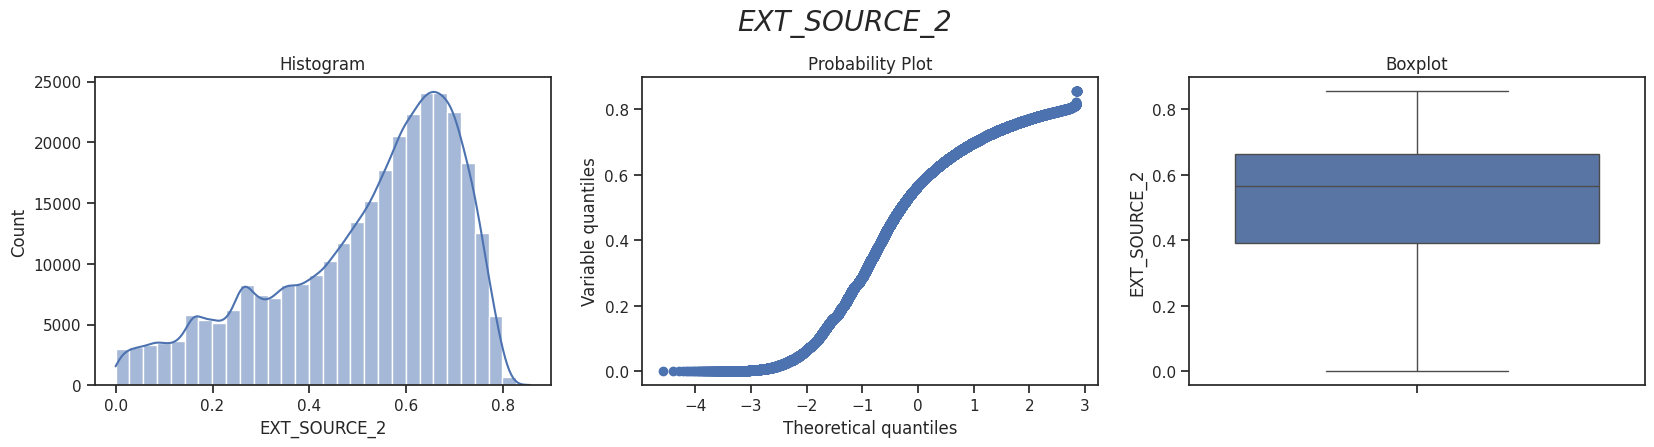

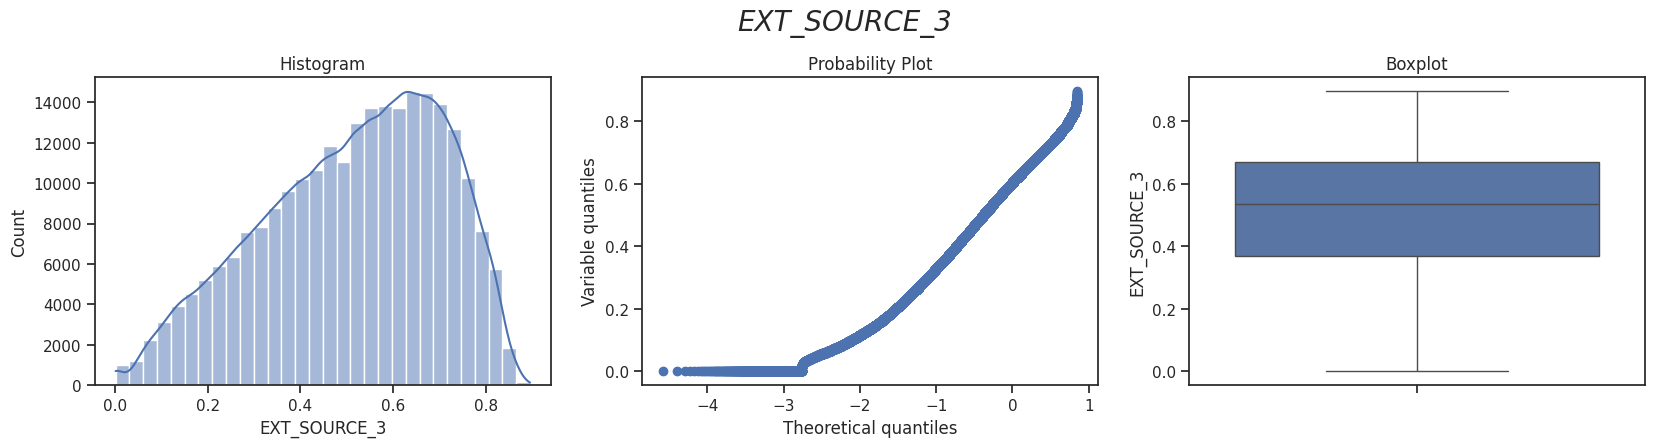

In [155]:
for col in cols:
    multiple_plots(app_train, col, col)

Nous constatons qu'aucune de ces variables ne suit une loi normale. Nous allons confirmer ces r√©sultats en effectuant des tests d'hypoth√®se et en calculant les statistiques d'asym√©trie.

In [156]:
skewness = app_train[cols].skew().rename('Skewness').to_frame()
display(skewness)

Skewness
AMT_INCOME_TOTAL  391.559654
AMT_CREDIT          1.234778
AMT_ANNUITY         1.579777
AMT_GOODS_PRICE     1.349000
EXT_SOURCE_2       -0.793576
EXT_SOURCE_3       -0.409390

Le r√©sultat montre que les variables EXT_SOURCE_2 et EXT_SOURCE_3 sont l√©g√®rement √©tal√©es vers la gauche, tandis que les autres variables sont toutes √©tal√©es vers la droite.

Effectuons le test de normalit√©

Pour v√©rifier la normalit√© de la distribution de nos variables, nous allons effectuer le test de D'Agostino et Pearson (normaltest). Ce test est bas√© sur une combinaison des statistiques ùëß de skewness (asym√©trie) et kurtosis (aplatissement).

In [157]:
alpha = 0.05
normal_test = {}
for col in cols:
    item = []
    print (f"[Test de normalit√© pour la variable pour la variable - {col}]")
    stat, p = stats.normaltest(app_train[col], nan_policy='omit')
    item.append(f"{p:.2f}")
    print ("Statistics : ", stat, "; p-value : ", p)
    if p < alpha:
        item.append("OUI")
        print("On rejette H0 : la normalit√© de la distribution est rejet√©e\n")
    else:
        item.append("NON")
        print("On accepte H0 : la normalit√© de la distribution est accept√©e\n")
    normal_test[col] = item

normal_test = pd.DataFrame(normal_test, columns=cols, index=['p-value', 'Rejet H0']).T
display(normal_test)

[Test de normalit√© pour la variable pour la variable - AMT_INCOME_TOTAL]
Statistics :  1808234.6742560286 ; p-value :  0.0
On rejette H0 : la normalit√© de la distribution est rejet√©e

[Test de normalit√© pour la variable pour la variable - AMT_CREDIT]
Statistics :  63010.56681797982 ; p-value :  0.0
On rejette H0 : la normalit√© de la distribution est rejet√©e

[Test de normalit√© pour la variable pour la variable - AMT_ANNUITY]
Statistics :  113942.4941549031 ; p-value :  0.0
On rejette H0 : la normalit√© de la distribution est rejet√©e

[Test de normalit√© pour la variable pour la variable - AMT_GOODS_PRICE]
Statistics :  73142.4550301524 ; p-value :  0.0
On rejette H0 : la normalit√© de la distribution est rejet√©e

[Test de normalit√© pour la variable pour la variable - EXT_SOURCE_2]
Statistics :  26544.814457892127 ; p-value :  0.0
On rejette H0 : la normalit√© de la distribution est rejet√©e

[Test de normalit√© pour la variable pour la variable - EXT_SOURCE_3]
Statistics :  1

p-value Rejet H0
AMT_INCOME_TOTAL    0.00      OUI
AMT_CREDIT          0.00      OUI
AMT_ANNUITY         0.00      OUI
AMT_GOODS_PRICE     0.00      OUI
EXT_SOURCE_2        0.00      OUI
EXT_SOURCE_3        0.00      OUI

In [158]:
recap_df = skewness.merge(normal_test, left_index=True, right_index=True)
display(recap_df)

Skewness p-value Rejet H0
AMT_INCOME_TOTAL  391.559654    0.00      OUI
AMT_CREDIT          1.234778    0.00      OUI
AMT_ANNUITY         1.579777    0.00      OUI
AMT_GOODS_PRICE     1.349000    0.00      OUI
EXT_SOURCE_2       -0.793576    0.00      OUI
EXT_SOURCE_3       -0.409390    0.00      OUI

#### *FLAG_DOCUMENTS*

Cette variable indique si le client a renseign√© le document N¬∞x demand√©.

In [159]:
cols = [
    'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7',
    'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13',
    'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19',
    'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21'
]


In [160]:
def multiple_bar_plot(df, cols, n_cols=3):

    n_rows = int(np.ceil(len(cols) / n_cols))

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))
    axes = axes.flatten()
    total = len(df)
    for i, col in enumerate(cols):
        ax = axes[i]
        sns.countplot(y=df[col], ax=ax, palette="pastel")
        ax.set_title(f'Countplot of {col}')
        ax.set_ylabel('Value')
        ax.set_xlabel('Count')
        for patch in ax.patches:
            count = patch.get_width()
            percentage = f"{(count / total) * 100:.2f}%"
            ax.text(
                    count / 2,
                    patch.get_y() + patch.get_height() / 2,
                    f"{count}({percentage})",
                    va='center',
                    color='darkblue',
                    fontweight='bold',
                    #bbox=dict(facecolor='lightyellow', alpha=0.5)
            )

    # Remove unused subplots
    for j in range(len(cols), len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

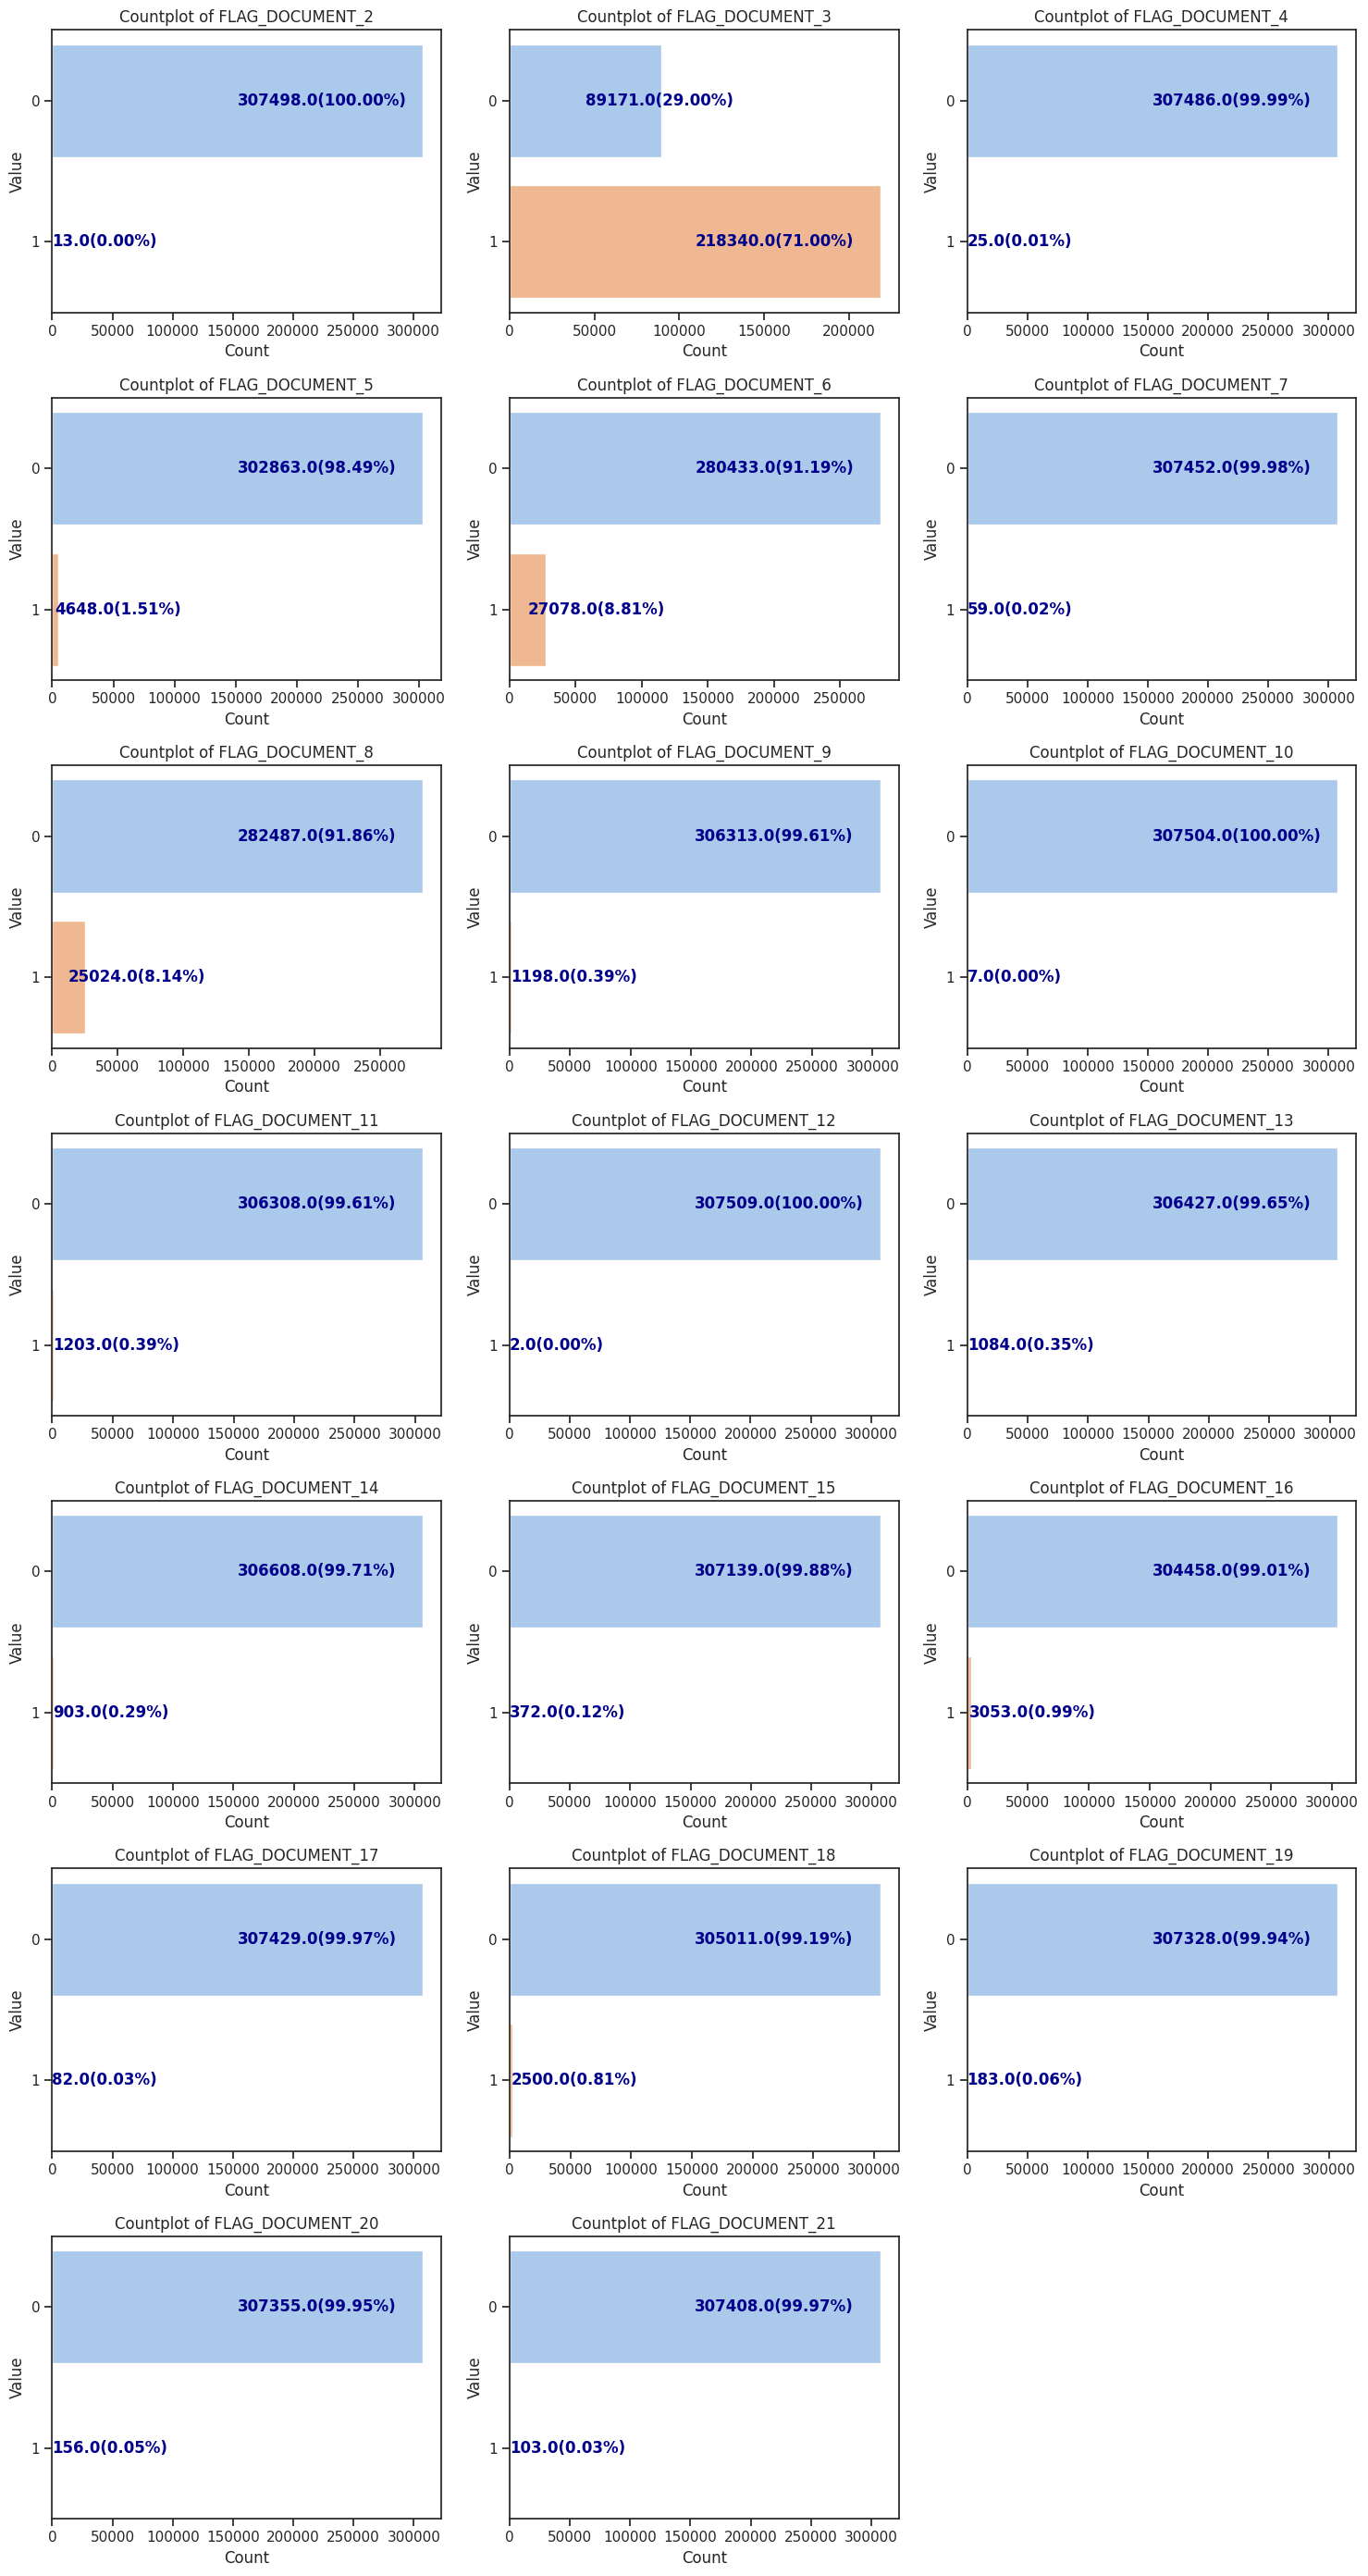

In [161]:
multiple_bar_plot(app_train, cols=cols)

Les diagrammes ci-dessus montrent de forts d√©s√©quilibres dans les modalit√©s des variables `flag_documents`. Nous allons conserver les variables `FLAG_DOCUMENT_3` `FLAG_DOCUMENT_6` et `FLAG_DOCUMENT_8` qui pr√©sentent une plus grande variance.

Ensuite nous supprimons les variables qui contient une modalit√© en dessous de 0,80% (`FLAG_DOCUMENT_2`, `FLAG_DOCUMENT_4`, `FLAG_DOCUMENT_7`, `FLAG_DOCUMENT_9`, `FLAG_DOCUMENT_10`, `FLAG_DOCUMENT_11`, `FLAG_DOCUMENT_12`, `FLAG_DOCUMENT_13`, `FLAG_DOCUMENT_14`, `FLAG_DOCUMENT_15`, `FLAG_DOCUMENT_17`, `FLAG_DOCUMENT_18`, `FLAG_DOCUMENT_19`, `FLAG_DOCUMENT_20`, et `FLAG_DOCUMENT_21` )

En ce qui concerne les autres variables, nous poursuivrons l'analyse pour √©valuer leur impact sur le d√©faut de remboursement, puis nous prendrons la d√©cision appropri√©e.

In [162]:
app_train.groupby('TARGET')[cols].mean()

FLAG_DOCUMENT_2  FLAG_DOCUMENT_3  FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  \
TARGET                                                                       
0              0.000032         0.704060         0.000088         0.015126   
1              0.000161         0.777925         0.000000         0.014985   

        FLAG_DOCUMENT_6  FLAG_DOCUMENT_7  FLAG_DOCUMENT_8  FLAG_DOCUMENT_9  \
TARGET                                                                       
0              0.090457         0.000198         0.082027         0.003976   
1              0.060705         0.000121         0.073958         0.002981   

        FLAG_DOCUMENT_10  FLAG_DOCUMENT_11  FLAG_DOCUMENT_12  \
TARGET                                                         
0               0.000025          0.003990          0.000007   
1               0.000000          0.003021          0.000000   

        FLAG_DOCUMENT_13  FLAG_DOCUMENT_14  FLAG_DOCUMENT_15  \
TARGET                                                         
0               0.003729          0.003088          0.001277   
1               0.001208          0.001208          0.000443   

        FLAG_DOCUMENT_16  FLAG_DOCUMENT_17  FLAG_DOCUMENT_18  \
TARGET                                                         
0               0.010269          0.000283          0.008341   
1               0.006042          0.000081          0.005720   

        FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  
TARGET                                                        
0               0.000605          0.000506          0.000315  
1               0.000483          0.000524          0.000564

Les moyennes des cibles (TARGET) en fonction des FLAG_DOCUMENT montrent des diff√©rences relativement faible :

Le tableau montre que la probabilit√© de la cible (par exemple, un d√©faut de cr√©dit) est l√©g√®rement plus faible pour les individus ayant FLAG_DOCUMENT_X = 1. Cependant, cette diff√©rence est petite. Pour elucider l'hypothese de l'indifference de la moyenne nous allons effctuer un test statistique de khi2

In [163]:
flags_to_remove = [
    'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10',
    'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15',
    'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21'
]

# Liste des colonnes √† tester
flags_to_test = [
    'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_18'
]


alpha = 0.05
from sklearn.feature_selection import SelectKBest, chi2


X = app_train[flags_to_test]
y = app_train["TARGET"]

# SelectKBest avec le test du chi¬≤
k_best = SelectKBest(chi2, k="all")
k_best.fit(X, y)

scores = k_best.scores_
p_values = k_best.pvalues_

feature_scores = pd.DataFrame({"Feature": flags_to_test, "Score": scores, "p_value": p_values})

feature_scores.sort_values(by="p_value", ascending=True, inplace=True)
display(feature_scores)

Feature      Score       p_value
1  FLAG_DOCUMENT_16  41.071566  1.467559e-10
2  FLAG_DOCUMENT_18  19.289026  1.123502e-05
0   FLAG_DOCUMENT_5   0.030200  8.620370e-01

In [164]:
#S√©lectionner les features avec p-value > alpha
flags_to_remove += feature_scores[feature_scores["p_value"] > alpha]["Feature"].tolist()

print("Colonnes √† supprimer:")
print(flags_to_remove)

Colonnes √† supprimer:
['FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21', 'FLAG_DOCUMENT_5']


Les variables ci dessus sont √† supprimer car elles ne sont pas discriminantes pour predire notre variable cible.

In [165]:
# Suppression des colonnes
app_train.drop(columns=flags_to_remove, inplace=True)
app_test.drop(columns=flags_to_remove, inplace=True)


# Aligner les deux datasets
train_labels = app_train['TARGET']

app_train, app_test = app_train.align(app_test, join = 'inner', axis = 1)
app_train['TARGET'] = train_labels


print("Les dimensions apr√©s suppression:")
print(app_train.shape, app_test.shape)

Les dimensions apr√©s suppression:
(307511, 67) (48744, 66)


In [166]:
app_train.DAYS_ID_PUBLISH.describe()

count    307511.000000
mean      -2994.202373
std        1509.450419
min       -7197.000000
25%       -4299.000000
50%       -3254.000000
75%       -1720.000000
max           0.000000
Name: DAYS_ID_PUBLISH, dtype: float64

## Analyse bivari√©e

Pour comprendre les donn√©es et les corr√©lations entre les caract√©ristiques et la cible, nous allons proc√©der √† une analyse bivari√©e.

Pour ce faire, nous nous appuierons sur des diagrammes et des coefficients statistiques.

Le coefficient de corr√©lation n'est pas la m√©thode la plus fiable pour repr√©senter la "pertinence" d'une caract√©ristique, mais il nous donne une id√©e des relations possibles dans les donn√©es. Voici quelques interpr√©tations g√©n√©rales de la valeur absolue du coefficient de corr√©lation :

- 0.00-0.19 : ‚Äútr√®s faible‚Äù
- 0.20-0.39 : ‚Äúfaible‚Äù
- 0.40-0.59 : ‚Äúmod√©r√©‚Äù
- 0.60-0.79 : ‚Äúfort‚Äù
- 0.80-1.0 : ‚Äútr√®s fort‚Äù

In [167]:
app_train_copy = app_train.drop(columns=['SK_ID_CURR'])

In [168]:
# Trouver des correlations avec la variable cible
correlations = app_train_copy.select_dtypes(include=np.number).corr()['TARGET'].sort_values().drop('TARGET')*100

print('Corr√©lations positives:\n', correlations.tail(15))
print('\nCorrelations negatives:\n', correlations.head(15))

Corr√©lations positives:
 FLAG_WORK_PHONE                2.852432
DEF_60_CNT_SOCIAL_CIRCLE       3.127647
DEF_30_CNT_SOCIAL_CIRCLE       3.224758
LIVE_CITY_NOT_WORK_CITY        3.251834
DAYS_REGISTRATION              4.197486
FLAG_DOCUMENT_3                4.434635
REG_CITY_NOT_LIVE_CITY         4.439537
FLAG_EMP_PHONE                 4.598222
REG_CITY_NOT_WORK_CITY         5.099446
DAYS_ID_PUBLISH                5.145717
DAYS_LAST_PHONE_CHANGE         5.521848
REGION_RATING_CLIENT           5.889901
REGION_RATING_CLIENT_W_CITY    6.089267
DAYS_EMPLOYED                  7.495846
DAYS_BIRTH                     7.823931
Name: TARGET, dtype: float64

Correlations negatives:
 EXT_SOURCE_3                 -17.891870
EXT_SOURCE_2                 -16.047167
FLOORSMAX_AVG                 -4.400337
FLOORSMAX_MEDI                -4.376792
FLOORSMAX_MODE                -4.322626
AMT_GOODS_PRICE               -3.964528
REGION_POPULATION_RELATIVE    -3.722715
TOTALAREA_MODE                -3.259555

In [169]:
# Diviser les colonnes en groupes de taille fixe 10
columns = list(app_train_copy.select_dtypes(include=np.number).columns)
columns.remove('TARGET')
group_size = 10
groups = [columns[i:i + group_size] for i in range(0, len(columns), group_size)]

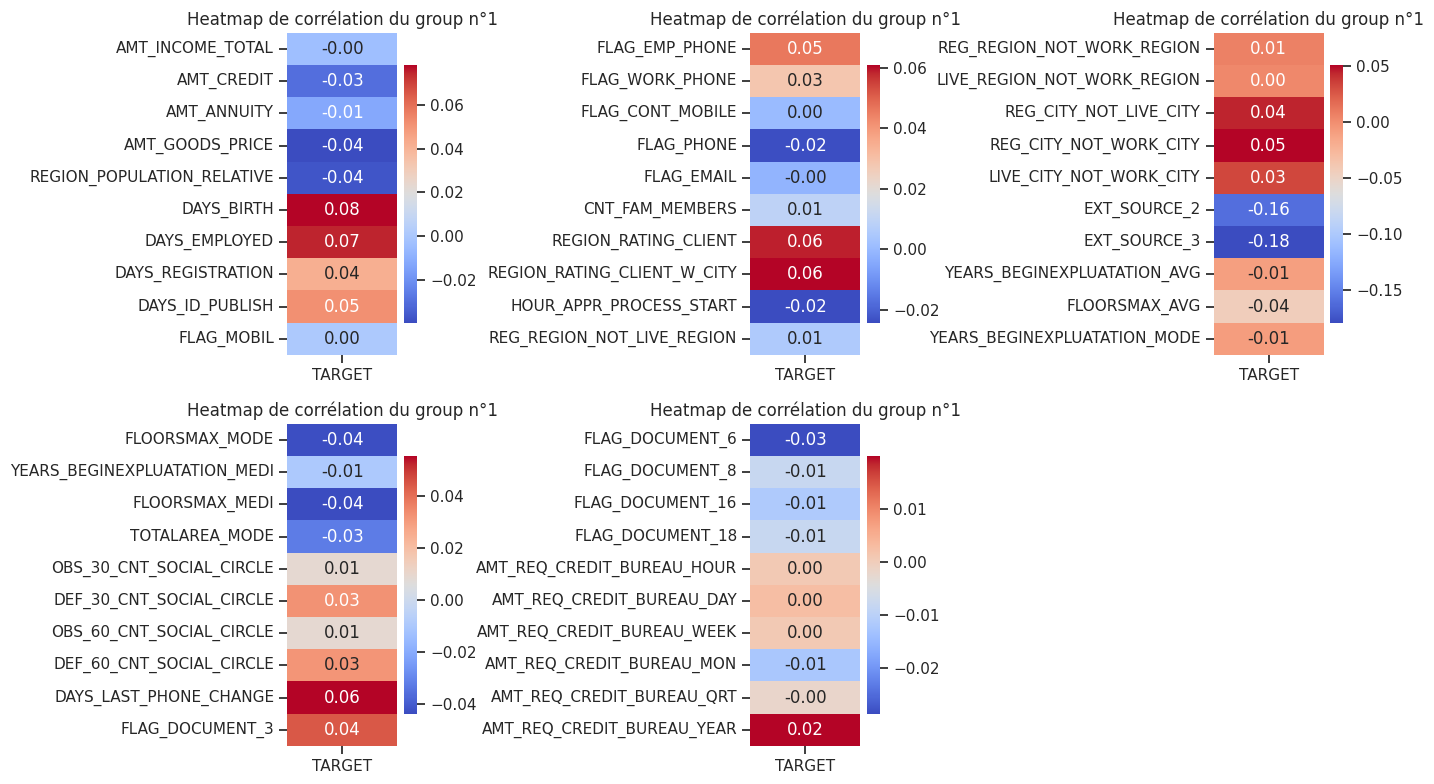

In [170]:
fig, axes = plt.subplots(2, 3, figsize=(14, 8))
axes = axes.flatten()
for i, group in enumerate(groups):
    ax = axes[i]
    group_with_target = group + ['TARGET']
    correlations = app_train_copy[group_with_target].corr()['TARGET'].drop('TARGET')

    sns.heatmap(
        correlations.to_frame(),
        annot=True,
        fmt=".2f",
        cmap="coolwarm",

        cbar_kws={"shrink": .8},
        ax=ax
    )
    ax.set_title(f"Heatmap de corr√©lation du group n¬∞{1}")

for j in range(len(groups), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Regardons quelques-unes des corr√©lations les plus significatives : `DAYS_BIRTH` est la corr√©lation positive (0.08) la plus √©lev√©e (√† l'exception de `TARGET`, car la corr√©lation d'une variable avec elle-m√™me est toujours √©gale √† 1 !). En consultant la documentation, on constate que `DAYS_BIRTH` correspond √† l'√¢ge du client en jours au moment du pr√™t, exprim√© en jours n√©gatifs (pour une raison quelconque !). La corr√©lation est positive, mais la valeur de cette variable est en r√©alit√© n√©gative, ce qui signifie que plus le client est √¢g√©, moins il est susceptible de faire d√©faut sur son pr√™t (c'est-√†-dire que la cible == 0). Cela peut pr√™ter √† confusion, donc nous allons prendre la valeur absolue de cette variable, ce qui inversera la corr√©lation en une valeur n√©gative.

Les 2 variables ayant les corr√©lations n√©gatives les plus fortes avec la cible sont `EXT_SOURCE_2` et `EXT_SOURCE_3`. D'apr√®s la documentation, ces variables repr√©sentent un "score normalis√© provenant d'une source de donn√©es externe". Je ne suis pas certain de ce que cela signifie exactement, mais il pourrait s'agir d'une sorte d'√©valuation de cr√©dit cumulative bas√©e sur de nombreuses sources de donn√©es.

### Effet de l'√¢ge sur le remboursement

In [171]:
app_train_copy['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])
app_train_copy['DAYS_BIRTH'].corr(app_train['TARGET'])

-0.07823930830982694

√Ä mesure que le client vieillit, il existe une relation lin√©aire n√©gative avec la cible, ce qui signifie que plus les clients sont √¢g√©s, plus ils ont tendance √† rembourser leurs pr√™ts √† temps.  

### Effet des sources exterieures

In [172]:
ext_data = app_train_copy[['TARGET', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]
ext_data_corrs = ext_data.corr()
ext_data_corrs

TARGET  EXT_SOURCE_2  EXT_SOURCE_3  DAYS_BIRTH
TARGET        1.000000     -0.160472     -0.178919   -0.078239
EXT_SOURCE_2 -0.160472      1.000000      0.109167    0.091996
EXT_SOURCE_3 -0.178919      0.109167      1.000000    0.205478
DAYS_BIRTH   -0.078239      0.091996      0.205478    1.000000

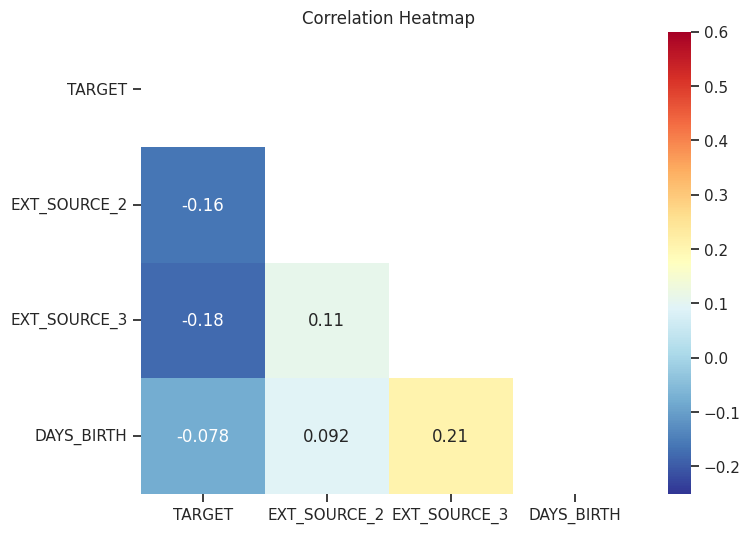

In [173]:
plt.figure(figsize = (8, 6))

mask = np.triu(np.ones_like(ext_data_corrs, dtype=bool))

sns.heatmap(ext_data_corrs, mask=mask, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)
plt.title('Correlation Heatmap');

Les 2 variables `EXT_SOURCE` ont des corr√©lations n√©gatives avec la cible, ce qui indique que lorsque la valeur de `EXT_SOURCE` augmente, le client est plus susceptible de rembourser le pr√™t. On peut √©galement constater que `DAYS_BIRTH` est positivement corr√©l√© avec `EXT_SOURCE_3`, ce qui sugg√®re que l'√¢ge du client pourrait √™tre l'un des facteurs pris en compte dans ce score.  

Ensuite, nous pouvons examiner la distribution de chacune de ces variables, color√©e en fonction de la valeur de la cible. Cela nous permettra de visualiser l'effet de ces variables sur la cible.

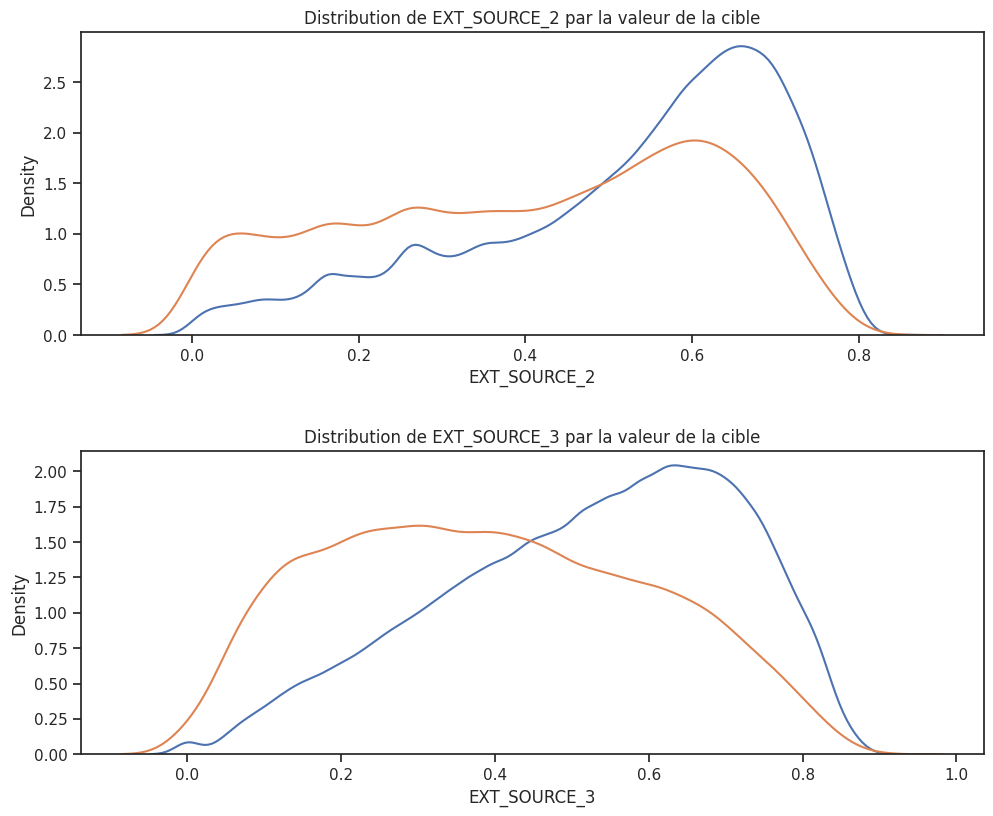

In [174]:
plt.figure(figsize = (10, 12))

for i, source in enumerate(['EXT_SOURCE_2', 'EXT_SOURCE_3']):

    plt.subplot(3, 1, i + 1)
    sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, source], label = 'target == 0')
    sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, source], label = 'target == 1')

    plt.title('Distribution de %s par la valeur de la cible' % source)
    plt.xlabel('%s' % source); plt.ylabel('Density');

plt.tight_layout(h_pad = 2.5)


`EXT_SOURCE_3` montre la plus grande diff√©rence entre les valeurs de la cible. On peut clairement voir que cette variable a une certaine relation avec la probabilit√© qu'un demandeur rembourse un pr√™t. La relation n'est pas tr√®s forte (en fait, elles sont toutes [consid√©r√©es comme tr√®s faibles](http://www.statstutor.ac.uk/resources/uploaded/pearsons.pdf)), mais ces variables seront tout de m√™me utiles pour un mod√®le de machine learning visant √† pr√©dire si un demandeur remboursera ou non un pr√™t √† temps.

### Pairs Plot

CPU times: user 1min 39s, sys: 1.37 s, total: 1min 40s
Wall time: 1min 30s


Text(0.5, 1.05, 'Source externe et Age')

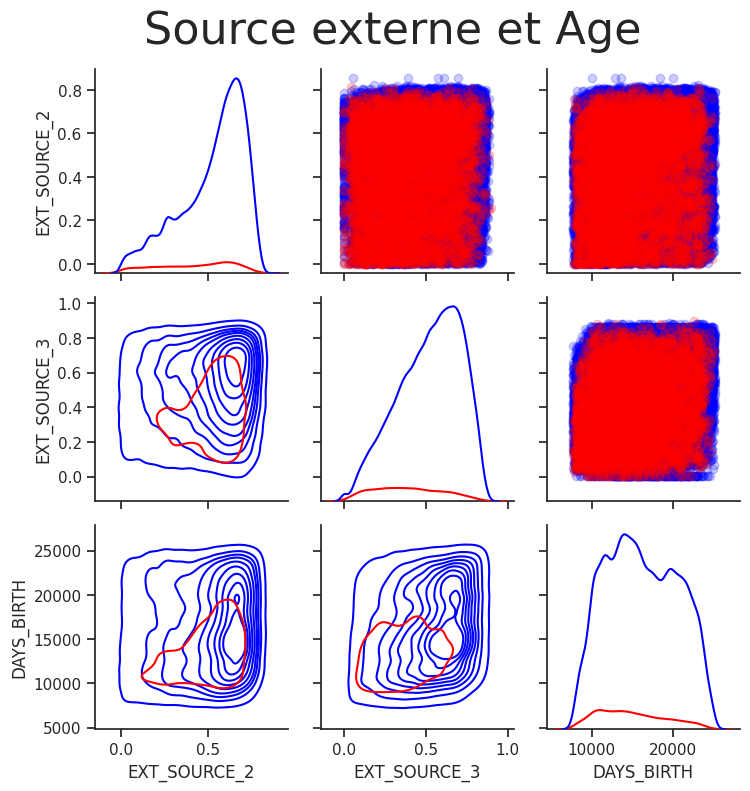

In [175]:
%%time

# Copy the data for plotting
plot_data = ext_data.copy()


# Drop na values and limit to first 100000 rows
plot_data = plot_data.dropna().loc[:100000, :]

# Function to calculate correlation coefficient between two columns
def corr_func(x, y, **kwargs):
    r = np.corrcoef(x, y)[0][1]
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.2, .8), xycoords=ax.transAxes,
                size = 20)

custom_palette = {0: "blue", 1: "red"}

# Create the pairgrid object
grid = sns.PairGrid(data = plot_data, diag_sharey=False,
                    hue = 'TARGET',
                    palette = custom_palette,
                    vars = [x for x in list(plot_data.columns) if x != 'TARGET'])

# Upper is a scatter plot
grid.map_upper(plt.scatter, alpha = 0.2)

# Diagonal is a histogram
grid.map_diag(sns.kdeplot)

# Bottom is density plot
grid.map_lower(sns.kdeplot, cmap = plt.cm.OrRd_r);

plt.suptitle('Source externe et Age', size = 32, y = 1.05);

Sur ce graphique, le rouge indique les pr√™ts qui n'ont pas √©t√© rembours√©s et le bleu repr√©sente les pr√™ts rembours√©s. Nous pouvons observer les diff√©rentes relations au sein des donn√©es. Il semble y avoir une relation lin√©aire positive mod√©r√©e entre `EXT_SOURCE_3` et `DAYS_BIRTH`, ce qui sugg√®re que cette variable pourrait prendre en compte l'√¢ge du client.

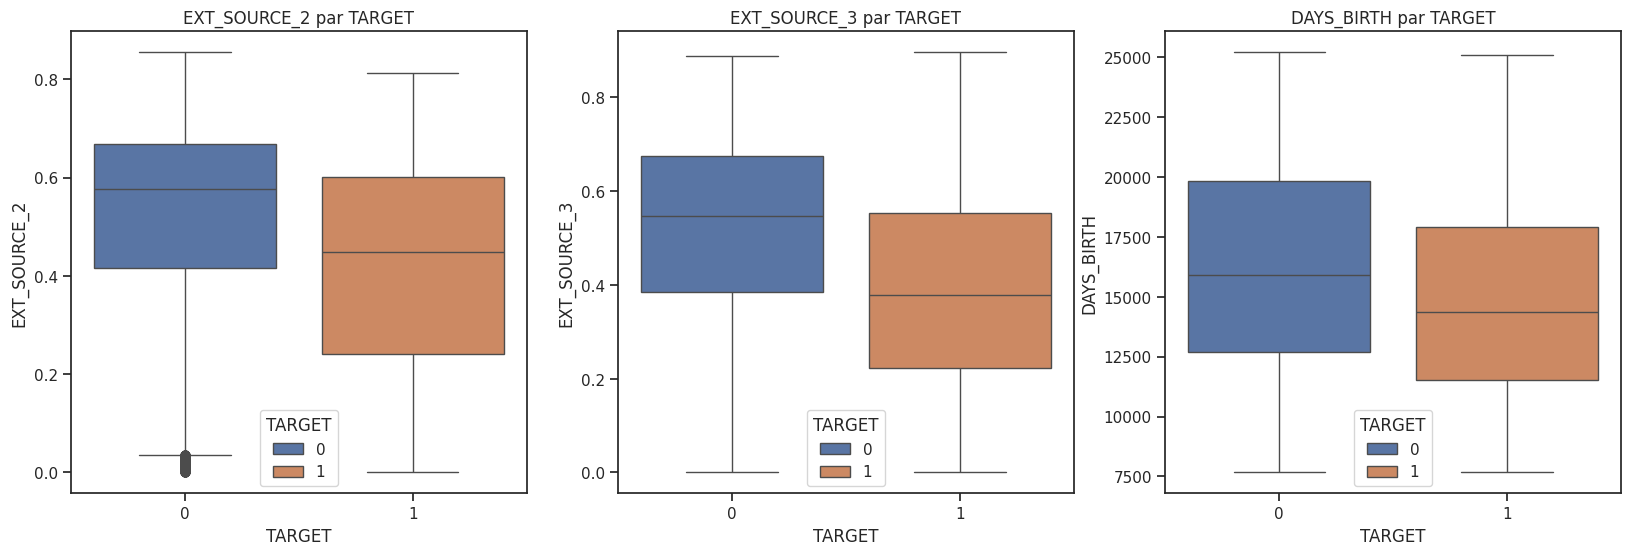

In [176]:
# Cr√©er les boxplots pour EXT_SOURCE_2 et EXT_SOURCE_3 par TARGET
plt.figure(figsize=(20, 6))

plt.subplot(1, 3, 1)
sns.boxplot(x="TARGET", y="EXT_SOURCE_2", data=plot_data, hue='TARGET')
plt.title("EXT_SOURCE_2 par TARGET")

plt.subplot(1, 3, 2)
sns.boxplot(x="TARGET", y="EXT_SOURCE_3", data=plot_data, hue='TARGET')
plt.title("EXT_SOURCE_3 par TARGET")

plt.subplot(1, 3, 3)
sns.boxplot(x="TARGET", y="DAYS_BIRTH", data=plot_data, hue='TARGET')
plt.title("DAYS_BIRTH par TARGET")

plt.show()

Hypoth√®ses du test :
1. Hypoth√®se nulle (H‚ÇÄ) : Les deux groupes proviennent de la m√™me distribution (les m√©dianes des deux groupes sont √©gales).
2. Hypoth√®se alternative (H‚ÇÅ) : Les deux groupes proviennent de distributions diff√©rentes (les m√©dianes des deux groupes sont diff√©rentes).


In [177]:
from scipy.stats import mannwhitneyu
# Test de Mann-Whitney pour voir si les diff√©rences sont significatives
ext2_target0 = plot_data[plot_data["TARGET"] == 0]["EXT_SOURCE_2"]
ext2_target1 = plot_data[plot_data["TARGET"] == 1]["EXT_SOURCE_2"]

ext3_target0 = plot_data[plot_data["TARGET"] == 0]["EXT_SOURCE_3"]
ext3_target1 = plot_data[plot_data["TARGET"] == 1]["EXT_SOURCE_3"]

days_birth_target0 = plot_data[plot_data["TARGET"] == 0]["DAYS_BIRTH"]
days_birth_target1 = plot_data[plot_data["TARGET"] == 1]["DAYS_BIRTH"]

stat_ext2, p_ext2 = mannwhitneyu(ext2_target0, ext2_target1, alternative="two-sided")
stat_ext3, p_ext3 = mannwhitneyu(ext3_target0, ext3_target1, alternative="two-sided")
stat_days_birth, p_days_birth = mannwhitneyu(days_birth_target0, days_birth_target1, alternative="two-sided")

alpha = 0.05

if p_ext2 > alpha:
    print("SOURCE_EXT_2 => On accepte H0 : les distributions sont similaires")
else:
    print("SOURCE_EXT_2 => On rejette H0 : les distributions sont diff√©rentes")

if p_ext3 > alpha:
    print("SOURCE_EXT_2 => On accepte H0 : les distributions sont similaires")
else:
    print("SOURCE_EXT_2 => On rejette H0 : les distributions sont diff√©rentes")

if p_days_birth > alpha:
    print("SOURCE_EXT_2 => On accepte H0 : les distributions sont similaires")
else:
    print("SOURCE_EXT_2 => On rejette H0 : les distributions sont diff√©rentes")

test_df = pd.DataFrame(
    {
     "Feature": ['EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH'],
     "stat": [stat_ext2, stat_ext3, stat_days_birth],
     "p_value": [p_ext2, p_ext3, p_days_birth]
    }
)


display(test_df)

SOURCE_EXT_2 => On rejette H0 : les distributions sont diff√©rentes
SOURCE_EXT_2 => On rejette H0 : les distributions sont diff√©rentes
SOURCE_EXT_2 => On rejette H0 : les distributions sont diff√©rentes


Feature         stat        p_value
0  EXT_SOURCE_2  299844407.5   0.000000e+00
1  EXT_SOURCE_3  313139711.5   0.000000e+00
2    DAYS_BIRTH  270062150.0  1.007131e-113

## Sauvegarde des jeux de donn√©es

In [178]:
app_train.to_csv(f"{folder_path}/cleaned_app_train.csv", encoding='utf-8', index=None)
app_test.to_csv(f"{folder_path}/cleaned_app_test.csv", encoding='utf-8', index=None)

FIN